In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import numpy as np
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq
from scipy import stats
import numpy as np
import scipy.stats as st

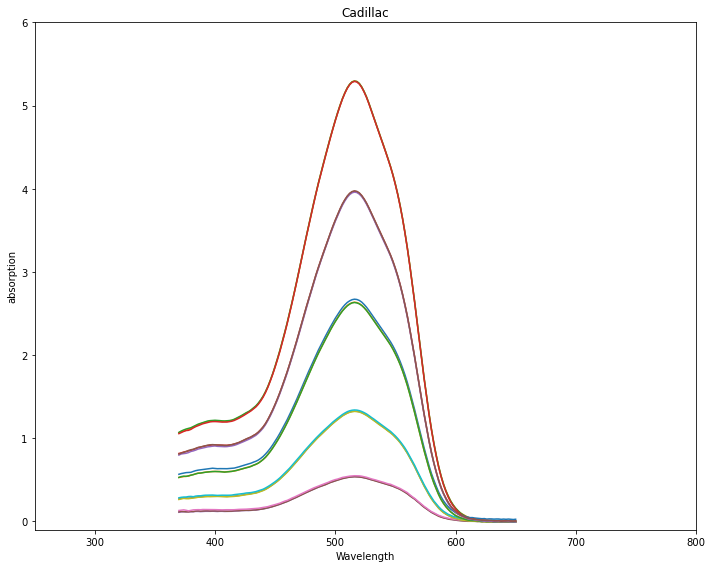

In [2]:
df = pd.read_csv('../../../CDOM_DATA/PATHLENGTH_DATA/data.csv')
df.index = df['wl'] 

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,6)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorption")
ax.set_title("Cadillac")
ax.get_legend().remove()
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/Cadillac.png')

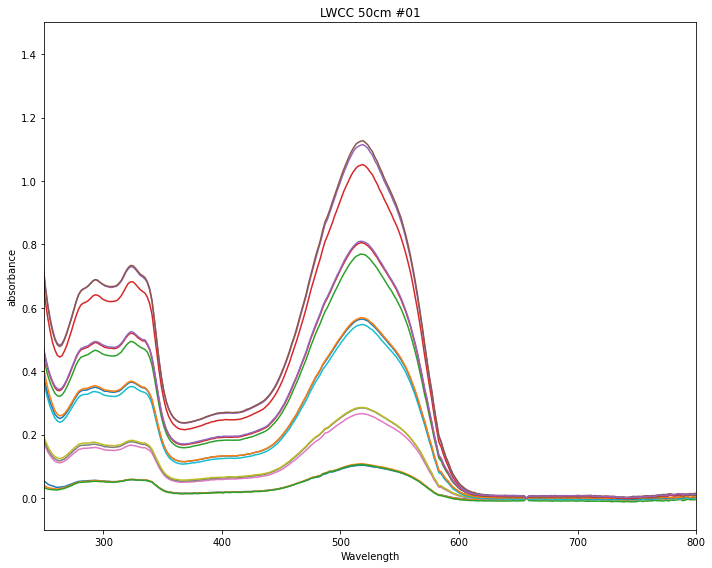

In [3]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA/LWCC_50cm_#1/LWCC_50cm_#01*.txt')

def GET_DATA(name):
    df = pd.read_csv(name, skiprows=15, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']
    x = df['wl']
    y = df['abs'] 
    pchip_obj1 = scipy.interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)
    xi = np.arange(189,881,2)
    yi = pchip_obj1(xi)
    d = {'wl': xi, 'abs': yi}
    df = pd.DataFrame(d)
    return df

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index

lwcc_50_01 = df

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,1.5)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorbance")
ax.set_title("LWCC 50cm #01")
ax.get_legend().remove()
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_50cm_#01.png')

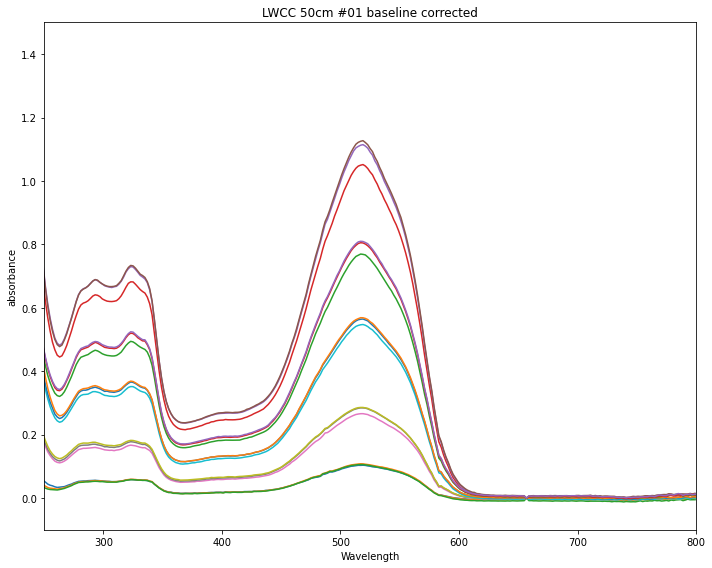

In [4]:
def GET_DATA_BC(name):
    df = pd.read_csv(name, skiprows=15, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']
    #df['wl'] = df['wl']
    #bcorr = df[(df['wl']>=700) & (df['wl']<=701)]['abs'].mean() # a float corection with just 700 nm 
    bcorr = df[(df['wl']>=700) & (df['wl']<=750)]['abs'].mean() # a float corection with 700 to 750 nm 
    df['abs'] = df['abs'] - bcorr
    x = df['wl']
    y = df['abs'] 
    pchip_obj1 = scipy.interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)
    xi = np.arange(189,881,2)
    yi = pchip_obj1(xi)
    d = {'wl': xi, 'abs': yi}
    df = pd.DataFrame(d)
    return df

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index
df

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,1.5)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorbance")
ax.set_title("LWCC 50cm #01 baseline corrected")
ax.get_legend().remove()
plt.tight_layout()

lwcc_50_01_BC = df

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_50cm_#01_BC.png')

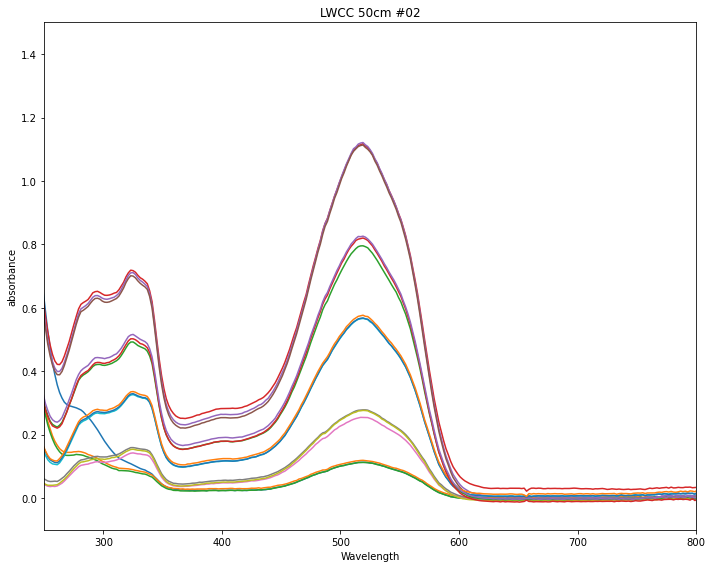

In [5]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA/LWCC_50cm_#2/LWCC_50*.txt')

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index

lwcc_50_02 = df

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,1.5)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorbance")
ax.set_title("LWCC 50cm #02")
ax.get_legend().remove()
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_50cm_#02.png')

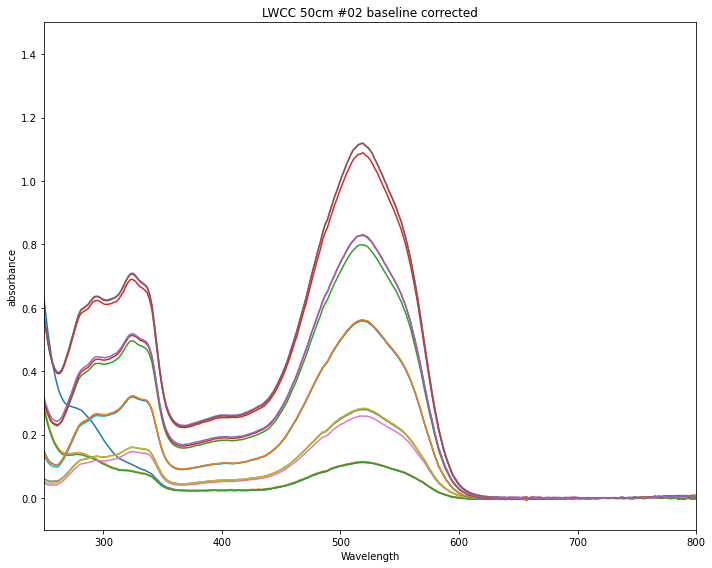

In [6]:
frames = []
for f in files:
    df = GET_DATA_BC(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index
df

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,1.5)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorbance")
ax.set_title("LWCC 50cm #02 baseline corrected")
ax.get_legend().remove()
plt.tight_layout()

lwcc_50_02_BC = df

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_50cm_#02_BC.png')

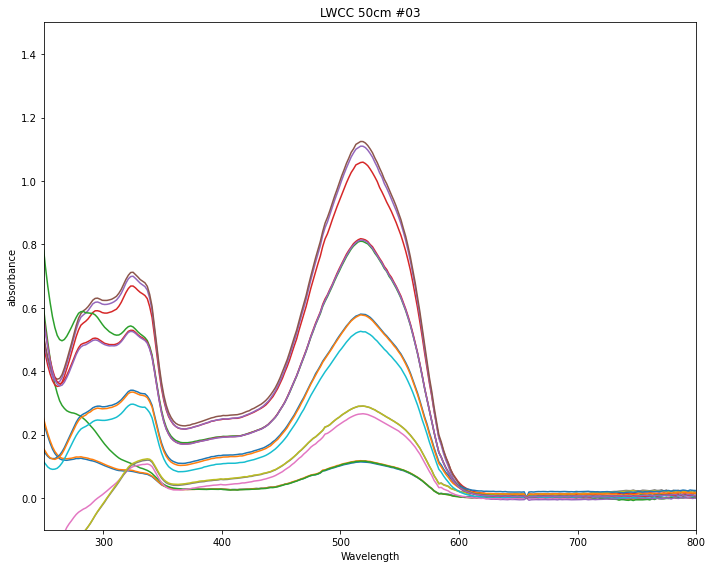

In [7]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA/LWCC_50cm_#3/LWCC_50*.txt')

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index

lwcc_50_03 = df

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,1.5)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorbance")
ax.set_title("LWCC 50cm #03")
ax.get_legend().remove()
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_50cm_#03.png')

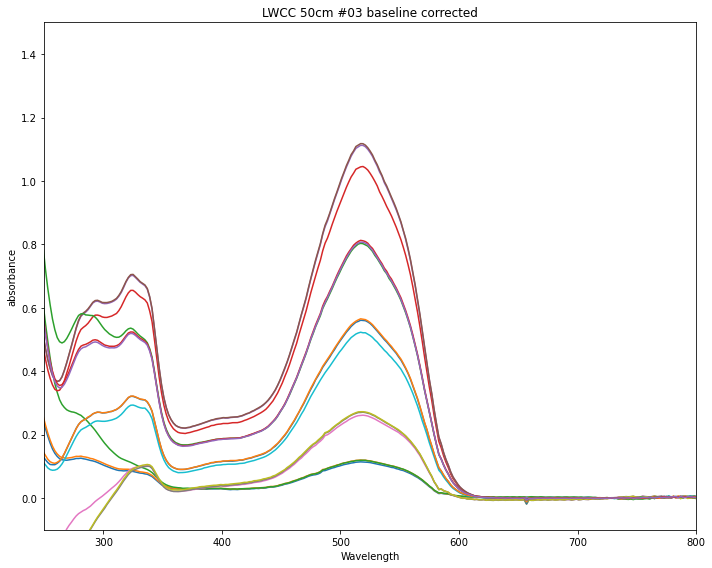

In [8]:
frames = []
for f in files:
    df = GET_DATA_BC(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index
df

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,1.5)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorbance")
ax.set_title("LWCC 50cm #03 baseline corrected")
ax.get_legend().remove()
plt.tight_layout()

lwcc_50_03_BC = df

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_50cm_#03_BC.png')

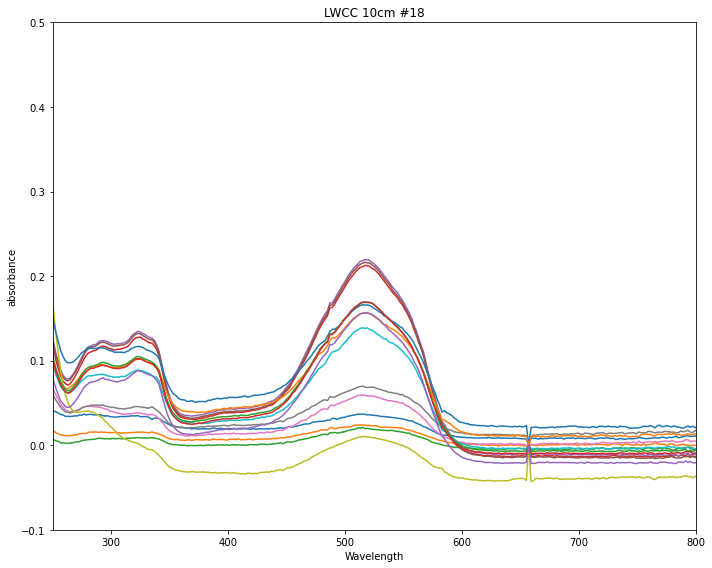

In [9]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA/LWCC_10cm_#18/*.txt')

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index

lwcc_10_18 = df

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,.5)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorbance")
ax.set_title("LWCC 10cm #18")
ax.get_legend().remove()
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_10cm.png')

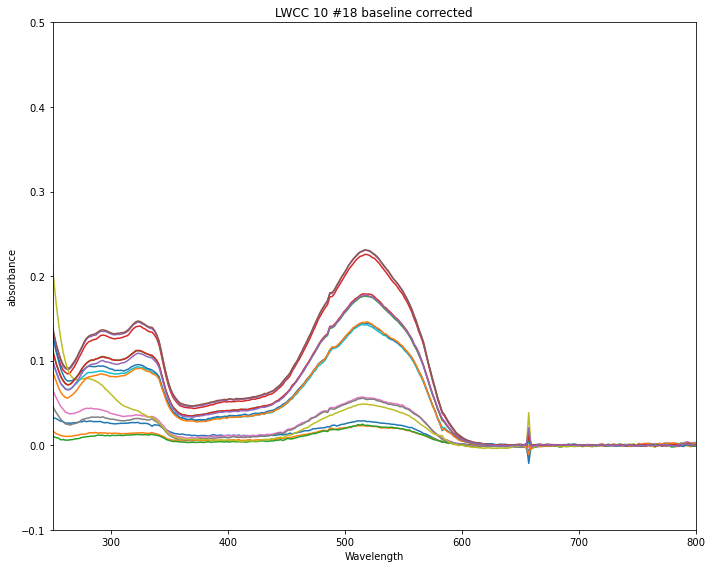

In [10]:


frames = []

for f in files:
    df = GET_DATA_BC(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index
df

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,.5)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorbance")
ax.set_title("LWCC 10 #18 baseline corrected")
ax.get_legend().remove()
plt.tight_layout()

lwcc_10_18_BC = df

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_10cm_BC.png')

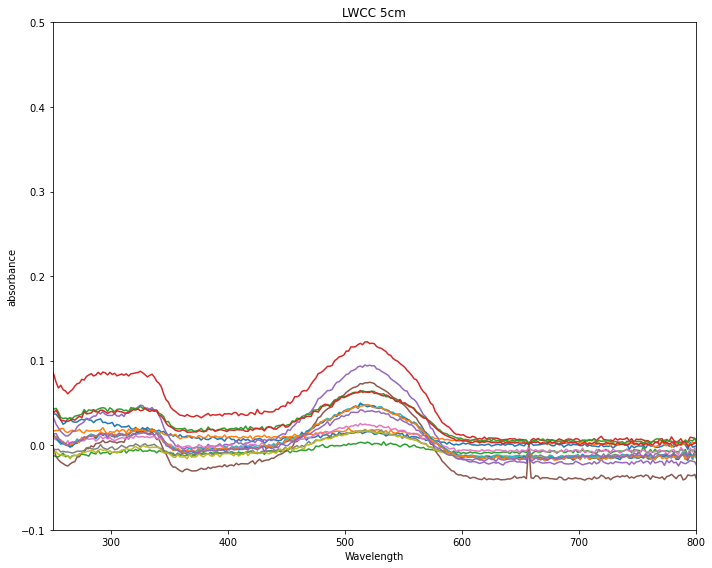

In [11]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA/LWCC_5cm/LWCC_5cm*.txt')

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index

lwcc_5 = df

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,.5)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorbance")
ax.set_title("LWCC 5cm")
ax.get_legend().remove()
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_5cm.png')

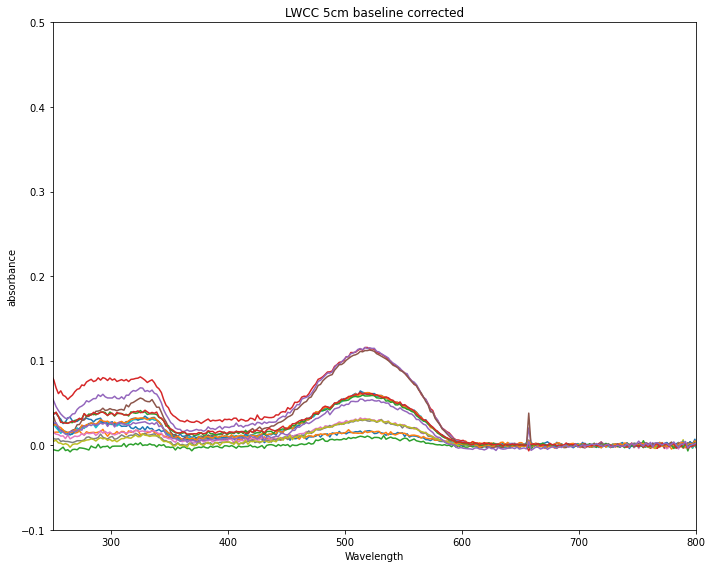

In [12]:

frames = []
for f in files:
    df = GET_DATA_BC(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index
df

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,.5)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorbance")
ax.set_title("LWCC 5cm baseline corrected")
ax.get_legend().remove()
plt.tight_layout()

lwcc_5_BC = df

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_5cm_BC.png')

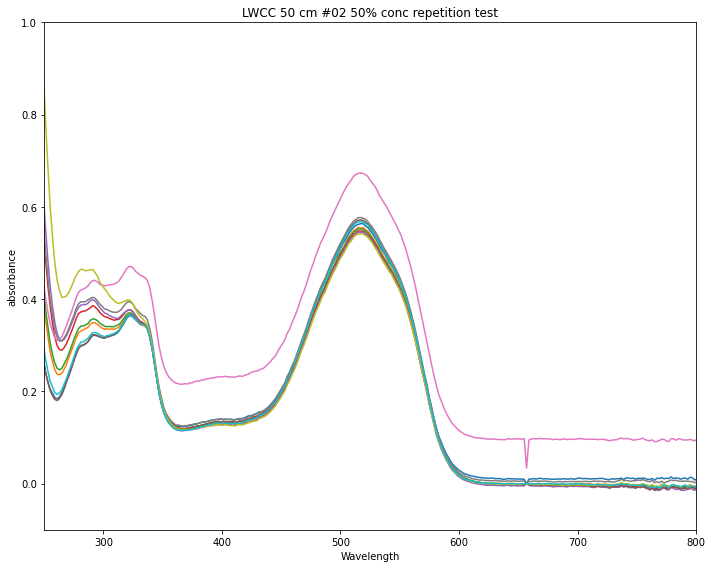

In [13]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA/Screw_and_unskrew/LWCC_50cm*.txt')

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index

lwcc_error_50_cm_test = df

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,1)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorbance")
ax.set_title("LWCC 50 cm #02 50% conc repetition test")
ax.get_legend().remove()
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_50_cm_50%_error_test.png')

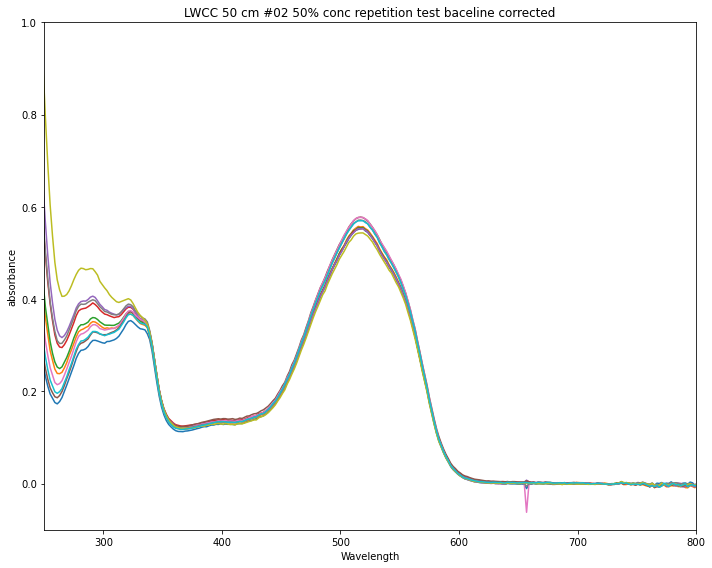

In [14]:
frames = []
for f in files:
    df = GET_DATA_BC(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index
df

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,1)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorbance")
ax.set_title("LWCC 50 cm #02 50% conc repetition test baceline corrected")
ax.get_legend().remove()
plt.tight_layout()

lwcc_error_50_cm_test_BC = df

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_50_cm_50%_error_test_BC.png')

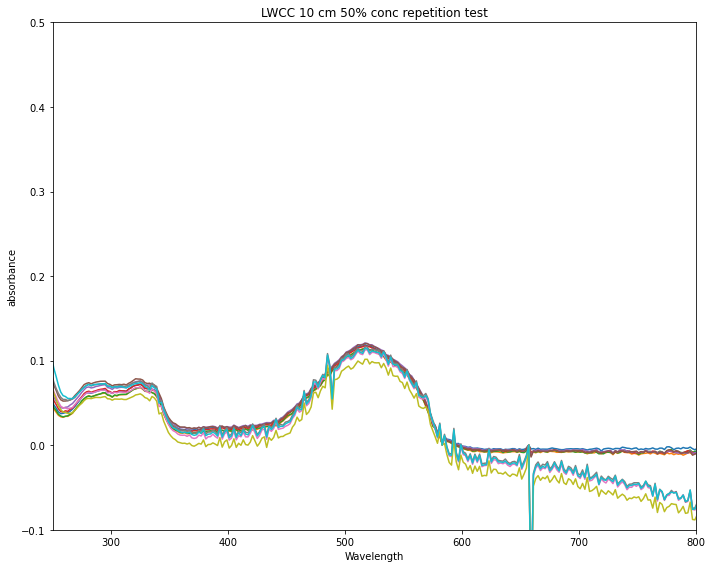

In [15]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA/Screw_and_unskrew/LWCC_10cm*.txt')

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index

lwcc_error_10_cm_test = df

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,.5)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorbance")
ax.set_title("LWCC 10 cm 50% conc repetition test")
ax.get_legend().remove()
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_10_cm_50%_error_test.png')

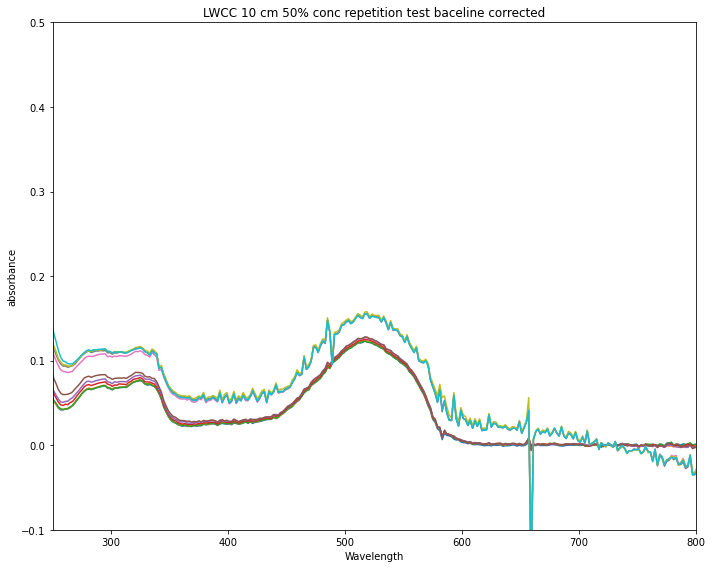

In [16]:

frames = []
for f in files:
    df = GET_DATA_BC(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index
df

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,.5)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorbance")
ax.set_title("LWCC 10 cm 50% conc repetition test baceline corrected")
ax.get_legend().remove()
plt.tight_layout()

lwcc_error_10_cm_test_BC = df

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_10_cm_50%_error_test_BC.png')

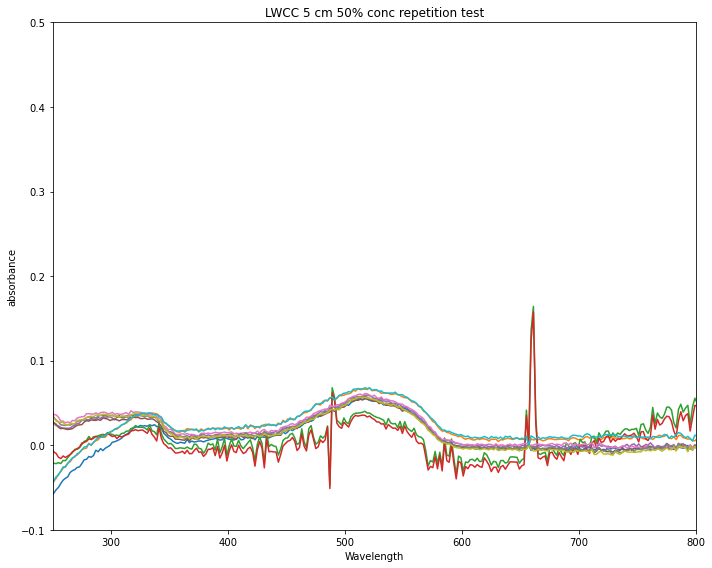

In [17]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA/Screw_and_unskrew/LWCC_5cm*.txt')

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index

lwcc_error_5_cm_test = df

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,.5)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorbance")
ax.set_title("LWCC 5 cm 50% conc repetition test")
ax.get_legend().remove()
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_5_cm_50%_error_test.png')

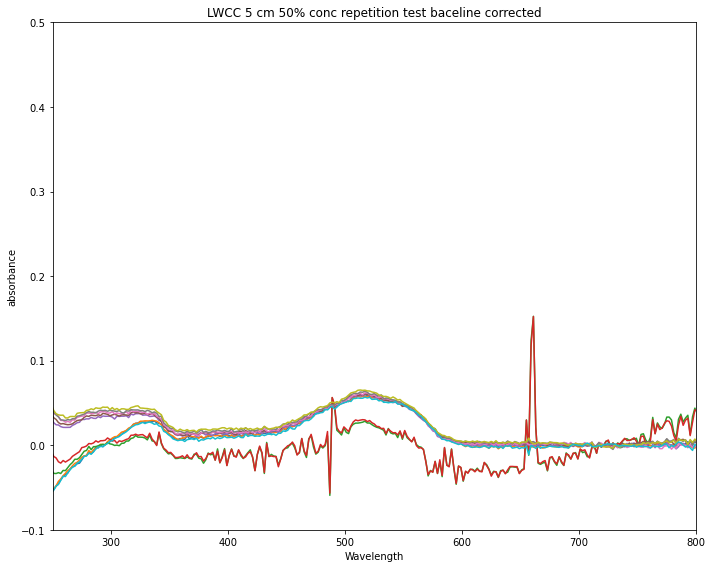

In [18]:

frames = []
for f in files:
    df = GET_DATA_BC(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index
df

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,.5)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorbance")
ax.set_title("LWCC 5 cm 50% conc repetition test baceline corrected")
ax.get_legend().remove()
plt.tight_layout()

lwcc_error_5_cm_test_BC = df

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_5_cm_50%_error_test_BC.png')

In [19]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA/LWCC_*/*.txt')

frames = []
for f in files:
    df = GET_DATA_BC(f) # runs the processing function 
    ID = f.split("\\")[2] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index

df = df[(df['wl']>=370) & (df['wl']<=651)]
df

df.to_csv('../../../CDOM_DATA/PATHLENGTH_DATA/data_concat.csv')

GET PATHLENGTHS

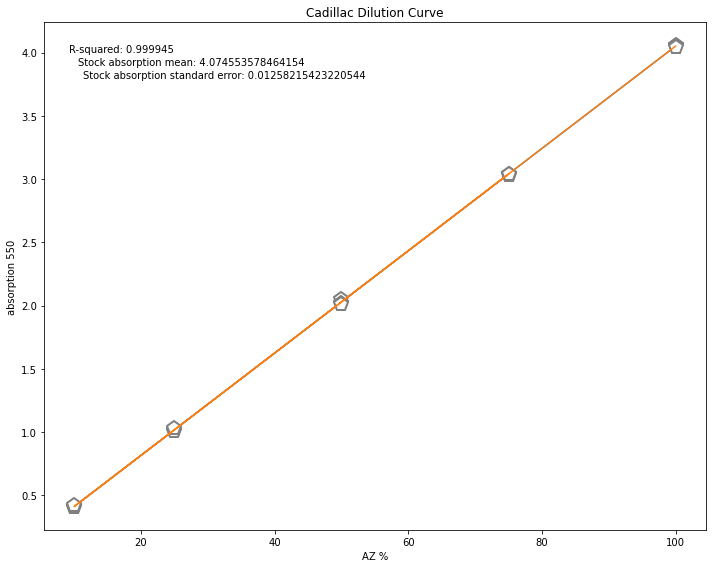

In [20]:
df = pd.read_csv('../../../CDOM_DATA/PATHLENGTH_DATA/data_all.csv')
df_grouped = df.groupby(by="LWCC")

df_cadi = df_grouped.get_group("Cadillac")
df_cadi

abs550 = df_cadi['a550']
conc = df_cadi['Conc']
dil = df_cadi['Dil']

res = stats.linregress(conc, abs550)

Stock_abs = dil * abs550
Stock_abs_mean = np.mean(Stock_abs)
Stock_abs_se = np.std(Stock_abs, ddof=1) / np.sqrt(np.size(Stock_abs))

m, b = np.polyfit(conc, abs550, 1)

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, m*conc+b)
ax.plot(conc, abs550, '-p', color='gray',
         markersize=15, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.plot(conc, m*conc+b)
ax.set_xlabel("AZ %")
ax.set_ylabel("absorption 550")
ax.text(17,4.0,f"R-squared: {res.rvalue**2:.6f}", fontsize=10, ha='center')
ax.text(27.5,3.9,f"Stock absorption mean: {Stock_abs_mean}", fontsize=10, ha='center')
ax.text(32.5,3.8,f"Stock absorption standard error: {Stock_abs_se}", fontsize=10, ha='center')
ax.set_title("Cadillac Dilution Curve")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/Cadillac_Dilution_Curve.png')

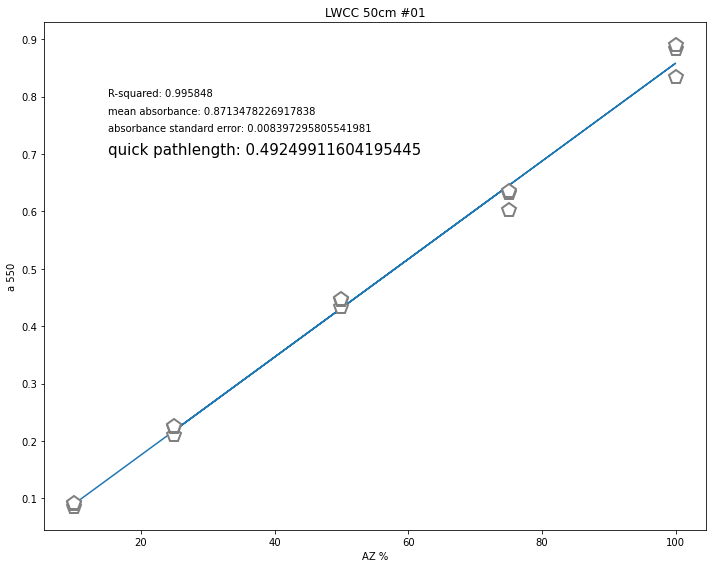

In [21]:
df_50cm_01 = df_grouped.get_group("50cm_#01")

a550 = df_50cm_01['a550']
conc = df_50cm_01['Conc']
dil = df_50cm_01['Dil']

res = stats.linregress(conc, a550)

cm_abs = dil * a550 
cm_abs_mean = np.mean(cm_abs)
cm_abs_se = np.std(cm_abs, ddof=1) / np.sqrt(np.size(cm_abs))

m, b = np.polyfit(conc, a550, 1)

L = cm_abs_mean * 2.303 /Stock_abs_mean

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, m*conc+b)
ax.plot(conc, a550, '-p', color='gray',
         markersize=15, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
ax.set_xlabel("AZ %")
ax.set_ylabel("a 550")
ax.text(15,.8,f"R-squared: {res.rvalue**2:.6f}", fontsize=10, ha='left')
ax.text(15,.77,f"mean absorbance: {cm_abs_mean}", fontsize=10, ha='left')
ax.text(15,.74,f"absorbance standard error: {cm_abs_se}", fontsize=10, ha='left')
ax.text(15,.7,f"quick pathlength: {L}", fontsize=15, ha='left')
ax.set_title("LWCC 50cm #01")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_50cm_#01_Dilution_Curve.png')

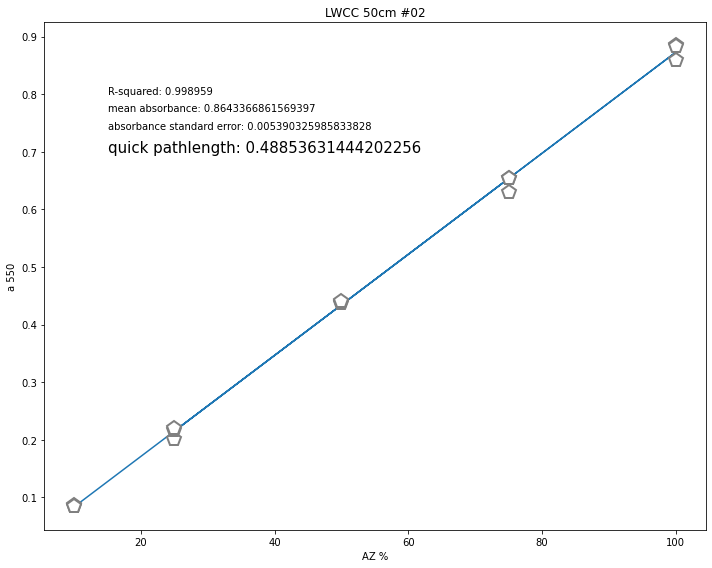

In [22]:
df_50cm_02 = df_grouped.get_group("50cm_#02")

a550 = df_50cm_02['a550']
conc = df_50cm_02['Conc']
dil = df_50cm_02['Dil']

res = stats.linregress(conc, a550)

cm_abs = dil * a550 
cm_abs_mean = np.mean(cm_abs)
cm_abs_se = np.std(cm_abs, ddof=1) / np.sqrt(np.size(cm_abs))

m, b = np.polyfit(conc, a550, 1)

L = cm_abs_mean * 2.303 /Stock_abs_mean

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, m*conc+b)
ax.plot(conc, a550, '-p', color='gray',
         markersize=15, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
ax.set_xlabel("AZ %")
ax.set_ylabel("a 550")
ax.text(15,.8,f"R-squared: {res.rvalue**2:.6f}", fontsize=10, ha='left')
ax.text(15,.77,f"mean absorbance: {cm_abs_mean}", fontsize=10, ha='left')
ax.text(15,.74,f"absorbance standard error: {cm_abs_se}", fontsize=10, ha='left')
ax.text(15,.7,f"quick pathlength: {L}", fontsize=15, ha='left')
ax.set_title("LWCC 50cm #02")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_50cm_#02_Dilution_Curve.png')

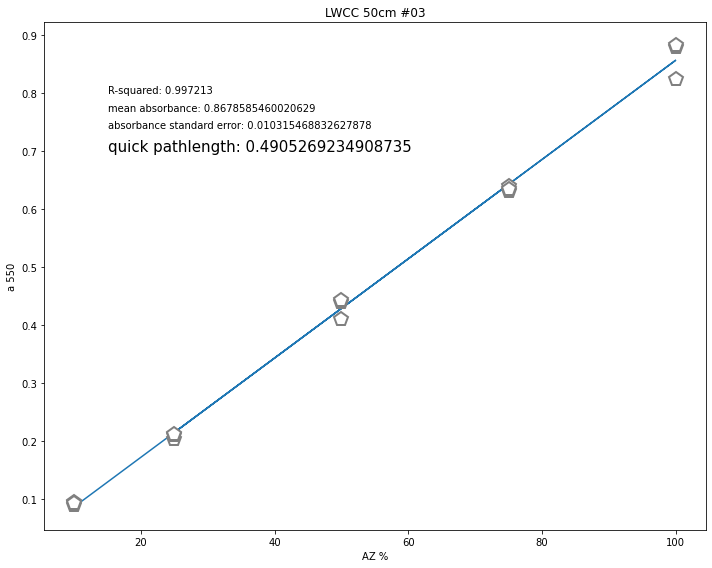

In [23]:
df_50cm_03 = df_grouped.get_group("50cm_#03")

a550 = df_50cm_03['a550']
conc = df_50cm_03['Conc']
dil = df_50cm_03['Dil']

res = stats.linregress(conc, a550)

cm_abs = dil * a550 
cm_abs_mean = np.mean(cm_abs)
cm_abs_se = np.std(cm_abs, ddof=1) / np.sqrt(np.size(cm_abs))

m, b = np.polyfit(conc, a550, 1)

L = cm_abs_mean * 2.303 /Stock_abs_mean

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, m*conc+b)
ax.plot(conc, a550, '-p', color='gray',
         markersize=15, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
ax.set_xlabel("AZ %")
ax.set_ylabel("a 550")
ax.text(15,.8,f"R-squared: {res.rvalue**2:.6f}", fontsize=10, ha='left')
ax.text(15,.77,f"mean absorbance: {cm_abs_mean}", fontsize=10, ha='left')
ax.text(15,.74,f"absorbance standard error: {cm_abs_se}", fontsize=10, ha='left')
ax.text(15,.7,f"quick pathlength: {L}", fontsize=15, ha='left')
ax.set_title("LWCC 50cm #03")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_50cm_#03_Dilution_Curve.png')

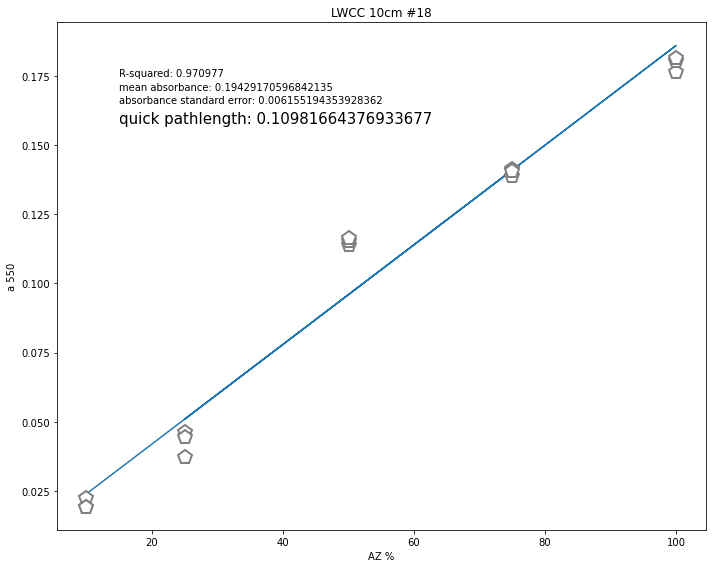

In [24]:
df_10cm = df_grouped.get_group("10cm")

a550 = df_10cm['a550']
conc = df_10cm['Conc']
dil = df_10cm['Dil']

res = stats.linregress(conc, a550)

cm_abs = dil * a550 
cm_abs_mean = np.mean(cm_abs)
cm_abs_se = np.std(cm_abs, ddof=1) / np.sqrt(np.size(cm_abs))

m, b = np.polyfit(conc, a550, 1)

L = cm_abs_mean * 2.303 /Stock_abs_mean

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, m*conc+b)
ax.plot(conc, a550, '-p', color='gray',
         markersize=15, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
ax.set_xlabel("AZ %")
ax.set_ylabel("a 550")
ax.text(15,.175,f"R-squared: {res.rvalue**2:.6f}", fontsize=10, ha='left')
ax.text(15,.17,f"mean absorbance: {cm_abs_mean}", fontsize=10, ha='left')
ax.text(15,.165,f"absorbance standard error: {cm_abs_se}", fontsize=10, ha='left')
ax.text(15,.158,f"quick pathlength: {L}", fontsize=15, ha='left')
ax.set_title("LWCC 10cm #18")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_10cm_#a_Dilution_Curve.png')

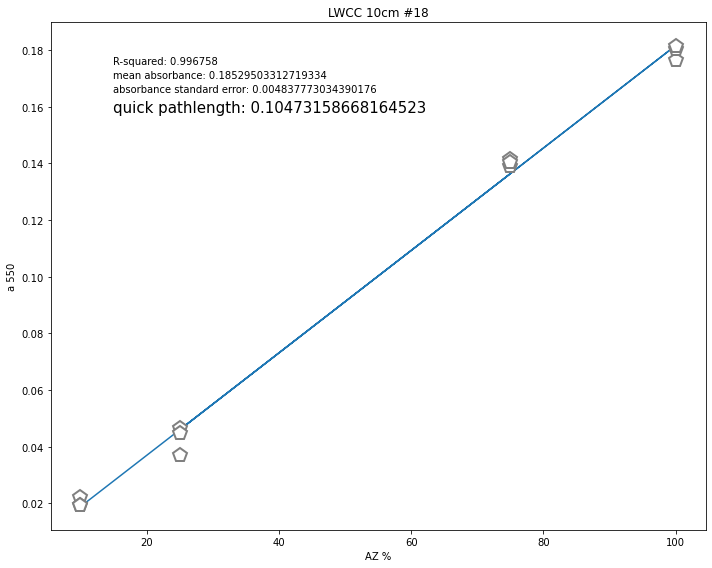

In [25]:
df_10cm = df_grouped.get_group("10cm")
df_10cm = df_10cm.drop([24,25,26], axis=0)

a550 = df_10cm['a550']
conc = df_10cm['Conc']
dil = df_10cm['Dil']

res = stats.linregress(conc, a550)

cm_abs = dil * a550 
cm_abs_mean = np.mean(cm_abs)
cm_abs_se = np.std(cm_abs, ddof=1) / np.sqrt(np.size(cm_abs))

m, b = np.polyfit(conc, a550, 1)

L = cm_abs_mean * 2.303 /Stock_abs_mean

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, m*conc+b)
ax.plot(conc, a550, '-p', color='gray',
         markersize=15, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
ax.set_xlabel("AZ %")
ax.set_ylabel("a 550")
ax.text(15,.175,f"R-squared: {res.rvalue**2:.6f}", fontsize=10, ha='left')
ax.text(15,.17,f"mean absorbance: {cm_abs_mean}", fontsize=10, ha='left')
ax.text(15,.165,f"absorbance standard error: {cm_abs_se}", fontsize=10, ha='left')
ax.text(15,.158,f"quick pathlength: {L}", fontsize=15, ha='left')
ax.set_title("LWCC 10cm #18")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_10cm_#b_Dilution_Curve.png')

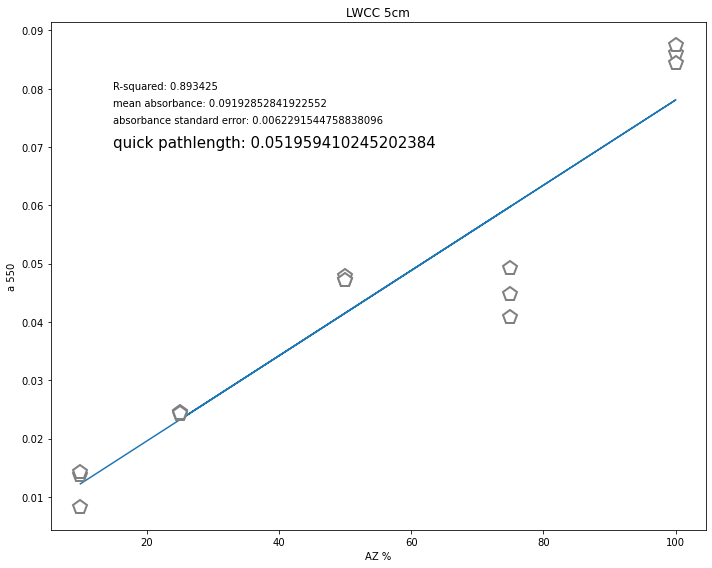

In [26]:
df_5cm = df_grouped.get_group("5cm")

a550 = df_5cm['a550']
conc = df_5cm['Conc']
dil = df_5cm['Dil']

res = stats.linregress(conc, a550)

cm_abs = dil * a550 
cm_abs_mean = np.mean(cm_abs)
cm_abs_se = np.std(cm_abs, ddof=1) / np.sqrt(np.size(cm_abs))

m, b = np.polyfit(conc, a550, 1)

L = cm_abs_mean * 2.303 /Stock_abs_mean

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, m*conc+b)
ax.plot(conc, a550, '-p', color='gray',
         markersize=15, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
ax.set_xlabel("AZ %")
ax.set_ylabel("a 550")
ax.text(15,.08,f"R-squared: {res.rvalue**2:.6f}", fontsize=10, ha='left')
ax.text(15,.077,f"mean absorbance: {cm_abs_mean}", fontsize=10, ha='left')
ax.text(15,.074,f"absorbance standard error: {cm_abs_se}", fontsize=10, ha='left')
ax.text(15,.07,f"quick pathlength: {L}", fontsize=15, ha='left')
ax.set_title("LWCC 5cm")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_5cm_#a_Dilution_Curve.png')

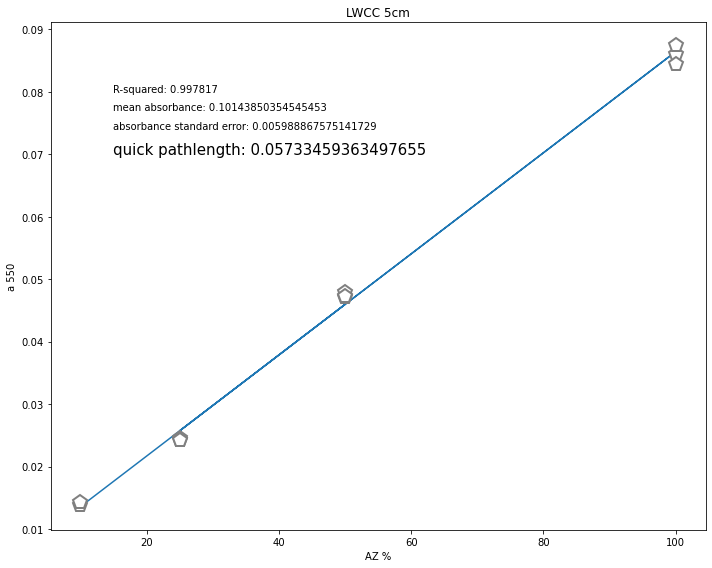

In [27]:
df_5cm = df_grouped.get_group("5cm")
df_5cm = df_5cm.drop([87,88,89,77], axis=0)

a550 = df_5cm['a550']
conc = df_5cm['Conc']
dil = df_5cm['Dil']

res = stats.linregress(conc, a550)

cm_abs = dil * a550 
cm_abs_mean = np.mean(cm_abs)
cm_abs_se = np.std(cm_abs, ddof=1) / np.sqrt(np.size(cm_abs))

m, b = np.polyfit(conc, a550, 1)

L = cm_abs_mean * 2.303 /Stock_abs_mean

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, m*conc+b)
ax.plot(conc, a550, '-p', color='gray',
         markersize=15, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
ax.set_xlabel("AZ %")
ax.set_ylabel("a 550")
ax.text(15,.08,f"R-squared: {res.rvalue**2:.6f}", fontsize=10, ha='left')
ax.text(15,.077,f"mean absorbance: {cm_abs_mean}", fontsize=10, ha='left')
ax.text(15,.074,f"absorbance standard error: {cm_abs_se}", fontsize=10, ha='left')
ax.text(15,.07,f"quick pathlength: {L}", fontsize=15, ha='left')
ax.set_title("LWCC 5cm")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_5cm_#b_Dilution_Curve.png')

In [28]:
#set the abs val for each Conc 

abs_100 = np.mean(abs550[0:3])
abs_10 = np.mean(abs550[3:6])
abs_25 = np.mean(abs550[6:9])
abs_50 = np.mean(abs550[9:12])
abs_75 = np.mean(abs550[12:15])

#cal path length for each mesure

df_conc = df.drop(df_grouped.get_group("Cadillac").index)
df_conc = df_conc.groupby(by="Conc")
df_100 = df_conc.get_group(100)
df_100["plath_L"] = df_100["a550"] * 2.303 / abs_100

df_75 = df_conc.get_group(75)
df_75["plath_L"] = df_75["a550"] * 2.303 / abs_75

df_50 = df_conc.get_group(50)
df_50["plath_L"] = df_50["a550"] * 2.303 / abs_50

df_25 = df_conc.get_group(25)
df_25["plath_L"] = df_25["a550"] * 2.303 / abs_25

df_10 = df_conc.get_group(10)
df_10["plath_L"] = df_10["a550"] * 2.303 / abs_10

df_PL = pd.concat([df_100, df_75], ignore_index=True)
df_PL = pd.concat([df_PL, df_50], ignore_index=True)
df_PL = pd.concat([df_PL, df_25], ignore_index=True)
df_PL = pd.concat([df_PL, df_10], ignore_index=True)
df_PL

C:\Users\12532\AppData\Local\Temp\ipykernel_18976\365277368.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100["plath_L"] = df_100["a550"] * 2.303 / abs_100
C:\Users\12532\AppData\Local\Temp\ipykernel_18976\365277368.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_75["plath_L"] = df_75["a550"] * 2.303 / abs_75
C:\Users\12532\AppData\Local\Temp\ipykernel_18976\365277368.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

ID      LWCC  Conc   Dil      a370      a372      a374  \
0   LWCC_10cm_#18_100%_a      10cm   100   1.0  0.043679  0.044213  0.043980   
1   LWCC_10cm_#18_100%_b      10cm   100   1.0  0.045582  0.046218  0.045685   
2   LWCC_10cm_#18_100%_c      10cm   100   1.0  0.046737  0.047302  0.047237   
3   LWCC_50cm_#01_100%_a  50cm_#01   100   1.0  0.215574  0.217715  0.218877   
4   LWCC_50cm_#01_100%_b  50cm_#01   100   1.0  0.234359  0.236409  0.237982   
..                   ...       ...   ...   ...       ...       ...       ...   
70   LWCC_50cm_#03_10%_b  50cm_#03    10  10.0  0.029201  0.029106  0.029695   
71   LWCC_50cm_#03_10%_c  50cm_#03    10  10.0  0.031275  0.030775  0.030973   
72        LWCC_5cm_10%_a       5cm    10  10.0  0.010429  0.010327  0.010908   
73        LWCC_5cm_10%_b       5cm    10  10.0  0.006842  0.007869  0.008447   
74        LWCC_5cm_10%_c       5cm    10  10.0 -0.000638 -0.000579 -0.003531   

        a376      a378      a380  ...      a634      a636      a638      a640  \
0   0.045312  0.045142  0.045895  ...  0.000540  0.000491  0.000079  0.000099   
1   0.047189  0.047648  0.047845  ...  0.000559  0.001165  0.000182  0.000301   
2   0.048175  0.047840  0.048898  ...  0.000459  0.000719  0.000735  0.000261   
3   0.221475  0.223266  0.225409  ...  0.002659  0.002059  0.002474  0.001676   
4   0.240092  0.241767  0.244150  ...  0.004249  0.003855  0.003759  0.003652   
..       ...       ...       ...  ...       ...       ...       ...       ...   
70  0.029444  0.029601  0.029886  ...  0.002849  0.002308  0.001701  0.002482   
71  0.030618  0.030605  0.030436  ...  0.004220  0.003082  0.002375  0.003575   
72  0.008981  0.010926  0.007548  ...  0.000838 -0.000986  0.001130  0.001302   
73  0.007813  0.006692  0.010070  ...  0.002816  0.002297  0.000242  0.003696   
74 -0.002434 -0.001716 -0.004019  ... -0.000775 -0.002587 -0.003638 -0.002038   

        a642      a644      a646      a648      a650   plath_L  
0   0.000743 -0.000181  0.000210  0.000352  0.000096  0.100208  
1   0.001061  0.000182  0.000557  0.000409  0.000026  0.102442  
2   0.001378 -0.000305  0.000275  0.000733  0.000262  0.103022  
3   0.001032  0.001434  0.001718  0.001740  0.001437  0.473434  
4   0.002977  0.002739  0.003210  0.003037  0.002801  0.501869  
..       ...       ...       ...       ...       ...       ...  
70  0.002501  0.002701  0.002665  0.002591  0.002133  0.526106  
71  0.003857  0.003514  0.004363  0.003548  0.003001  0.523884  
72  0.001292  0.001923  0.000870  0.001868  0.001468  0.076597  
73  0.003366  0.002726  0.001444  0.002554  0.002833  0.079470  
74 -0.002384 -0.000162 -0.002484 -0.000942 -0.001810  0.046304  

[75 rows x 146 columns]

In [29]:
#Define the WPI Pathlengths
WPI_LWCC_50_01 = .489 
WPI_LWCC_50_02 = .4875 
WPI_LWCC_50_03 = .488 

WPI_LWCC_10 = .1
WPI_LWCC_5 = .05 

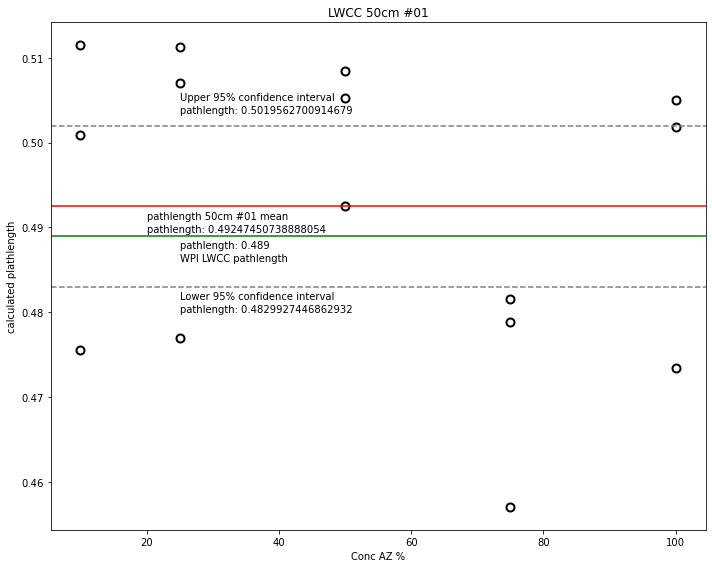

In [30]:
#plot resuts 

df_PL_groups = df_PL.groupby(by="LWCC")
df_PL_group = df_PL_groups.get_group("50cm_#01")

plath_L = df_PL_group['plath_L']
conc = df_PL_group['Conc']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_50cm_01 = np.mean(plath_L)
CI_lower_50cm_01 = CI_lower
CI_upper_50cm_01 = CI_upper

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(25,CI_lower-.0015,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(25,CI_lower-.003,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(25,CI_upper+.0030,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(25,CI_upper+.0015,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(20,np.mean(plath_L)-.003,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(20,np.mean(plath_L)-.0015,"pathlength 50cm #01 mean", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_50_01), c='green')
ax.text(25,WPI_LWCC_50_01-.0030,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(25,WPI_LWCC_50_01-.0015,f"pathlength: {WPI_LWCC_50_01}", fontsize=10, ha='left')

ax.set_xlabel("Conc AZ %")
ax.set_ylabel("calculated plathlength")
ax.set_title("LWCC 50cm #01")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_50cm_#01_plathlength.png')

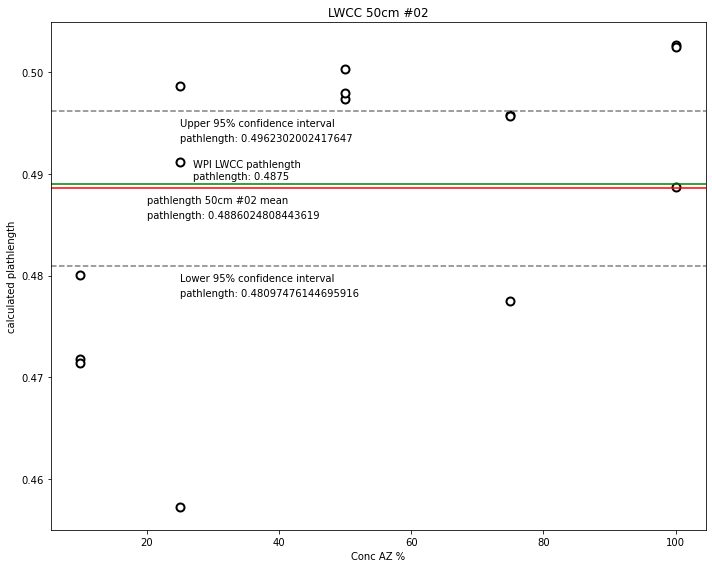

In [31]:
#plot resuts 

df_PL_groups = df_PL.groupby(by="LWCC")
df_PL_group = df_PL_groups.get_group("50cm_#02")

plath_L = df_PL_group['plath_L']
conc = df_PL_group['Conc']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_50cm_02 = np.mean(plath_L)
CI_lower_50cm_02 = CI_lower
CI_upper_50cm_02 = CI_upper

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(25,CI_lower-.0015,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(25,CI_lower-.003,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(25,CI_upper-.0015,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(25,CI_upper-.0030,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(20,np.mean(plath_L)-.003,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(20,np.mean(plath_L)-.0015,"pathlength 50cm #02 mean", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_50_01), c='green')
ax.text(27,WPI_LWCC_50_02+.0032,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(27,WPI_LWCC_50_02+.0020,f"pathlength: {WPI_LWCC_50_02}", fontsize=10, ha='left')

ax.set_xlabel("Conc AZ %")
ax.set_ylabel("calculated plathlength")
ax.set_title("LWCC 50cm #02")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_50cm_#02_plathlength.png')

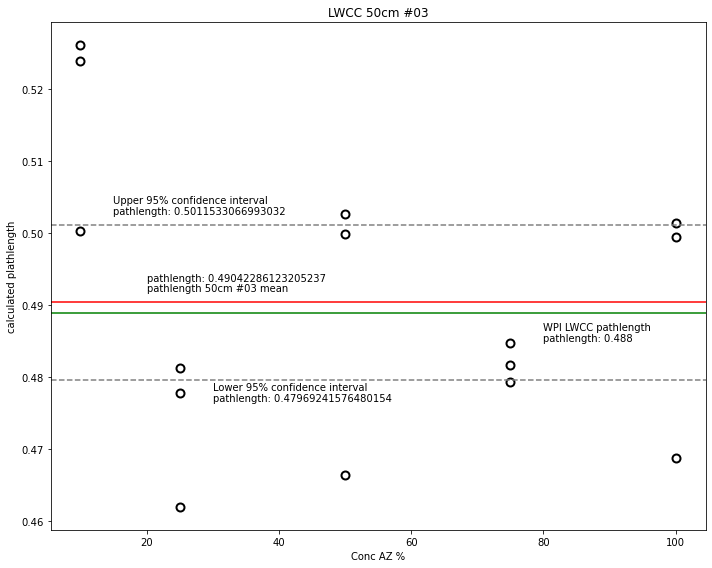

In [32]:
#plot resuts 

df_PL_groups = df_PL.groupby(by="LWCC")
df_PL_group = df_PL_groups.get_group("50cm_#03")

plath_L = df_PL_group['plath_L']
conc = df_PL_group['Conc']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_50cm_03 = np.mean(plath_L)
CI_lower_50cm_03 = CI_lower
CI_upper_50cm_03 = CI_upper


fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(30,CI_lower-.0015,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(30,CI_lower-.003,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(15,CI_upper+.0030,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(15,CI_upper+.0015,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(20,np.mean(plath_L)+.003,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(20,np.mean(plath_L)+.0015,"pathlength 50cm #03 mean", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_50_01), c='green')
ax.text(80,WPI_LWCC_50_03-.0015,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(80,WPI_LWCC_50_03-.0030,f"pathlength: {WPI_LWCC_50_03}", fontsize=10, ha='left')

ax.set_xlabel("Conc AZ %")
ax.set_ylabel("calculated plathlength")
ax.set_title("LWCC 50cm #03")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_50cm_#03_plathlength.png')

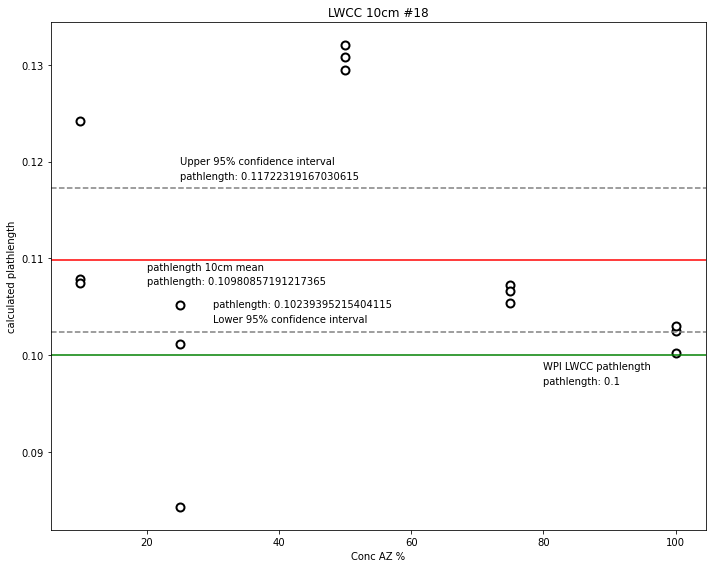

In [33]:
#plot resuts 

df_PL_groups = df_PL.groupby(by="LWCC")
df_PL_group = df_PL_groups.get_group("10cm")

plath_L = df_PL_group['plath_L']
conc = df_PL_group['Conc']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_10cm_a = np.mean(plath_L)
CI_lower_10cm_a = CI_lower
CI_upper_10cm_a = CI_upper

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(30,CI_lower+.0010,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(30,CI_lower+.0025,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(25,CI_upper+.0025,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(25,CI_upper+.0010,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_10), c='green')
ax.text(80,WPI_LWCC_10-.0015,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(80,WPI_LWCC_10-.0030,f"pathlength: {WPI_LWCC_10}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(20,np.mean(plath_L)-.0025,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(20,np.mean(plath_L)-.0010,"pathlength 10cm mean", fontsize=10, ha='left')

ax.set_xlabel("Conc AZ %")
ax.set_ylabel("calculated plathlength")
ax.set_title("LWCC 10cm #18")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_10cm_a_plathlength.png')

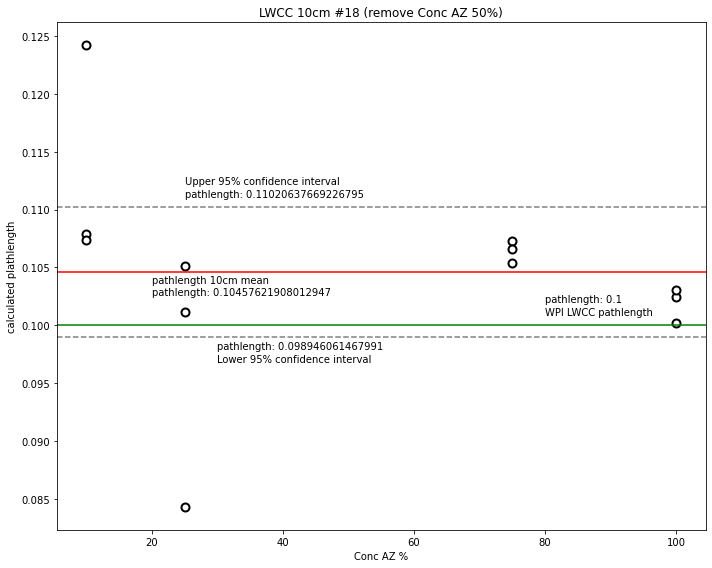

In [34]:
#plot resuts 

df_PL_groups = df_PL.groupby(by="LWCC")
df_PL_group = df_PL_groups.get_group("10cm")
df_PL_group = df_PL_group.drop([30,31,32], axis = 0)

plath_L = df_PL_group['plath_L']
conc = df_PL_group['Conc']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_10cm_b = np.mean(plath_L)
CI_lower_10cm_b = CI_lower
CI_upper_10cm_b = CI_upper


fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(30,CI_lower-.0021,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(30,CI_lower-.0010,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(25,CI_upper+.0020,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(25,CI_upper+.0009,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(20,np.mean(plath_L)-.0020,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(20,np.mean(plath_L)-.0009,"pathlength 10cm mean", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_10), c='green')
ax.text(80,WPI_LWCC_10+.0009,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(80,WPI_LWCC_10+.0020,f"pathlength: {WPI_LWCC_10}", fontsize=10, ha='left')

ax.set_xlabel("Conc AZ %")
ax.set_ylabel("calculated plathlength")
ax.set_title("LWCC 10cm #18 (remove Conc AZ 50%)")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_10cm_b_plathlength.png')

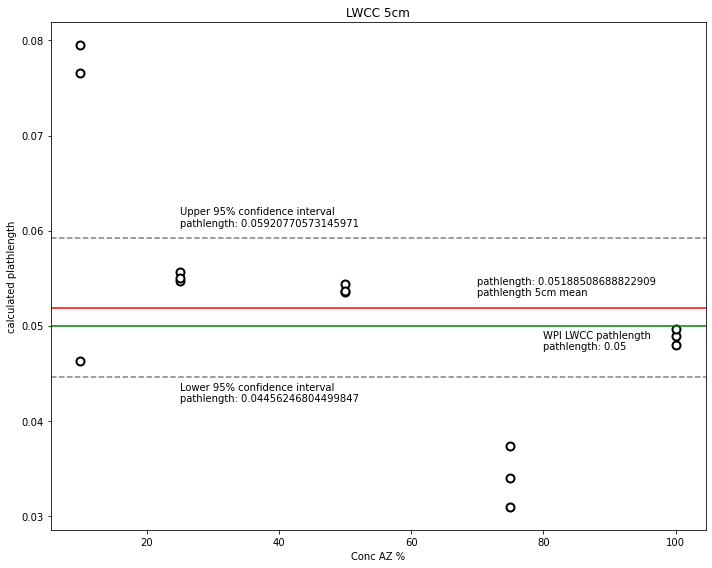

In [35]:
#plot resuts 

df_PL_groups = df_PL.groupby(by="LWCC")
df_PL_group = df_PL_groups.get_group("5cm")

plath_L = df_PL_group['plath_L']
conc = df_PL_group['Conc']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_5cm_a = np.mean(plath_L)
CI_lower_5cm_a = CI_lower
CI_upper_5cm_a = CI_upper

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(25,CI_lower-.0013,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(25,CI_lower-.0025,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(25,CI_upper+.0025,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(25,CI_upper+.0013,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(70,np.mean(plath_L)+.0025,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(70,np.mean(plath_L)+.0013,"pathlength 5cm mean", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_5), c='green')
ax.text(80,WPI_LWCC_5-.0013,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(80,WPI_LWCC_5-.0025,f"pathlength: {WPI_LWCC_5}", fontsize=10, ha='left')

ax.set_xlabel("Conc AZ %")
ax.set_ylabel("calculated plathlength")
ax.set_title("LWCC 5cm")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_5cm_a_plathlength.png')

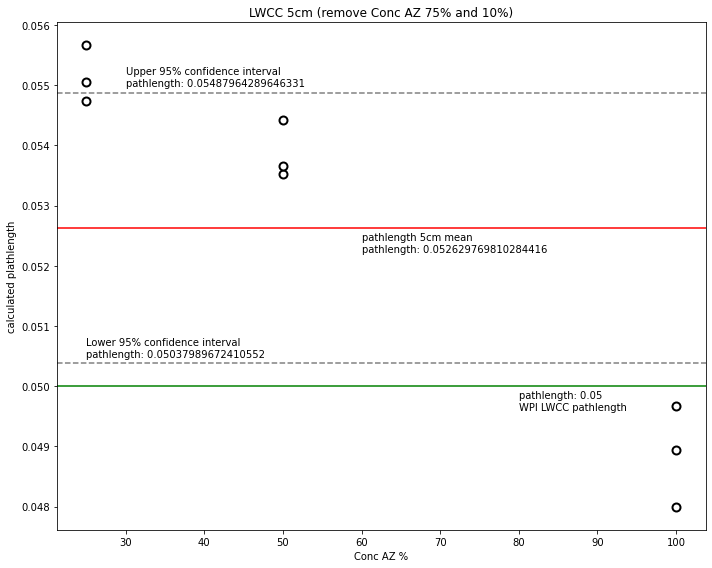

In [36]:
#plot resuts 

df_PL_groups = df_PL.groupby(by="LWCC")
df_PL_group = df_PL_groups.get_group("5cm")
df_PL_group = df_PL_group.drop([27,28,29,74,73,72], axis=0)


plath_L = df_PL_group['plath_L']
conc = df_PL_group['Conc']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_5cm_b = np.mean(plath_L)
CI_lower_5cm_b = CI_lower
CI_upper_5cm_b = CI_upper

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(25,CI_lower+.0003,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(25,CI_lower+.0001,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(30,CI_upper+.0003,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(30,CI_upper+.0001,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(60,np.mean(plath_L)-.0004,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(60,np.mean(plath_L)-.0002,"pathlength 5cm mean", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_5), c='green')
ax.text(80,WPI_LWCC_5-.0004,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(80,WPI_LWCC_5-.0002,f"pathlength: {WPI_LWCC_5}", fontsize=10, ha='left')

ax.set_xlabel("Conc AZ %")
ax.set_ylabel("calculated plathlength")
ax.set_title("LWCC 5cm (remove Conc AZ 75% and 10%)")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_5cm_b_plathlength.png')

In [37]:
d = {'50cm_#01_curve': pathlength_50cm_01, 
    '50cm_#02_curve': pathlength_50cm_02, 
    '50cm_#03_curve': pathlength_50cm_03,
    '10cm_a_curve': pathlength_10cm_a, 
    '10cm_b_curve': pathlength_10cm_b,
    '5cm_a_curve': pathlength_5cm_a, 
    '5cm_b_curve': pathlength_5cm_b}
pathlength_data_cal = pd.DataFrame(d, index = ['meters'])
pathlength_data_cal = pathlength_data_cal.T
pathlength_data_cal["CI_lower"] = [CI_lower_50cm_01, CI_lower_50cm_02, CI_lower_50cm_03, CI_lower_10cm_a, 
                              CI_lower_10cm_b, CI_lower_5cm_a, CI_lower_5cm_b]
pathlength_data_cal["CI_upper"] = [CI_upper_50cm_01, CI_upper_50cm_02, CI_upper_50cm_03, CI_upper_10cm_a, 
                              CI_upper_10cm_b, CI_upper_5cm_a, CI_upper_5cm_b]

pathlength_data_cal.to_csv('../../../CDOM_DATA/PATHLENGTH_DATA/pathlength_data_cal.csv')

pathlength_data_cal

meters  CI_lower  CI_upper
50cm_#01_curve  0.492475  0.482993  0.501956
50cm_#02_curve  0.488602  0.480975  0.496230
50cm_#03_curve  0.490423  0.479692  0.501153
10cm_a_curve    0.109809  0.102394  0.117223
10cm_b_curve    0.104576  0.098946  0.110206
5cm_a_curve     0.051885  0.044562  0.059208
5cm_b_curve     0.052630  0.050380  0.054880

In [38]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA/Screw_and_unskrew/LWCC_50cm*.txt')

def GET_DATA_BC_WPI(name):
    df = pd.read_csv(name, skiprows=17, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']
    bcorr = df[(df['wl']>=700) & (df['wl']<=750)]['abs'].mean() # a float corection with 700 to 750 nm 
    df['abs'] = df['abs'] - bcorr
    x = df['wl']
    y = df['abs'] 
    pchip_obj1 = scipy.interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)
    xi = np.arange(190,881,2)
    yi = pchip_obj1(xi)
    d = {'wl': xi, 'abs': yi}
    df = pd.DataFrame(d)
    return df

def GET_DATA_WPI(name):
    df = pd.read_csv(name, skiprows=17, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']
    x = df['wl']
    y = df['abs'] 
    pchip_obj1 = scipy.interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)
    xi = np.arange(190,881,2)
    yi = pchip_obj1(xi)
    d = {'wl': xi, 'abs': yi}
    df = pd.DataFrame(d)
    return df

frames = []
for f in files:
    df = GET_DATA_BC_WPI(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index

df = df[(df['wl']>=370) & (df['wl']<=651)]
dft = df.T
dft = dft.drop(['wl'], axis=0)
df = df*2.303/WPI_LWCC_50_02
df['wl'] = df.index

df2 = df.drop(['wl'], axis=1)

mean_50cm_bc = df2.mean(axis=1)
SD_50cm_bc = df2.std(axis=1)
SE_50cm_bc = df2.sem(axis=1)
MAD_50cm_bc = df2.mad(axis=1)

C:\Users\12532\AppData\Local\Temp\ipykernel_18976\4292248006.py:45: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


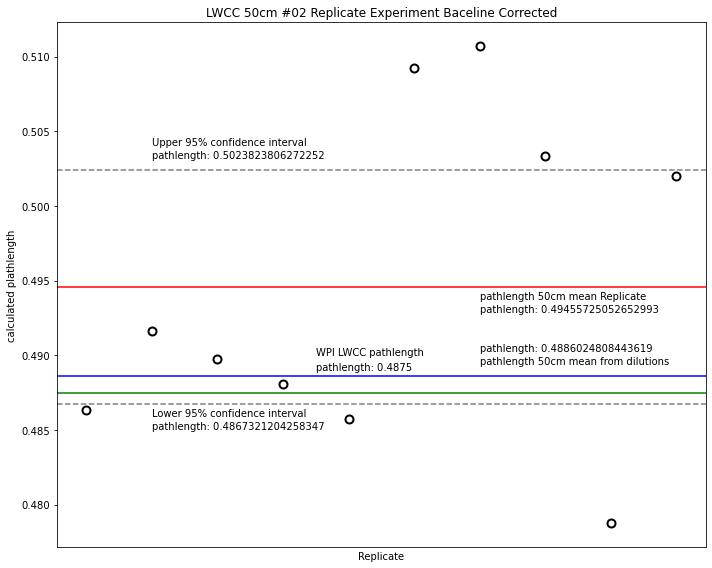

In [39]:
#pathlegth calculations 
df = dft.add_prefix('a')
df["plath_L"] = df["a550"] * 2.303 / abs_50

#plot resuts 
plath_L = df['plath_L']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_50cm_rep_BC = np.mean(plath_L)
CI_lower_50cm_rep_BC = CI_lower
CI_upper_50cm_rep_BC = CI_upper

fig, ax = plt.subplots(figsize=(10,8))
ax.plot( plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(1,CI_lower-.0008,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_lower-.0017,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(1,CI_upper+.0017,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_upper+.0008,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(6,np.mean(plath_L)-.0017,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(6,np.mean(plath_L)-.0008,"pathlength 50cm mean Replicate", fontsize=10, ha='left')

ax.axhline(y=pathlength_50cm_02, c='blue')
ax.text(6,pathlength_50cm_02+.0017,f"pathlength: {pathlength_50cm_02}", fontsize=10, ha='left')
ax.text(6,pathlength_50cm_02+.0008,"pathlength 50cm mean from dilutions", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_50_02), c='green')
ax.text(3.5,WPI_LWCC_50_02+.0025,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(3.5,WPI_LWCC_50_02+.0015,f"pathlength: {WPI_LWCC_50_02}", fontsize=10, ha='left')

ax.set_xlabel("Replicate")
ax.set_ylabel("calculated plathlength")
ax.set_title("LWCC 50cm #02 Replicate Experiment Baceline Corrected")
ax.set_xticks([])
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_50cm_#02_Replicate_Experiment_plathlength_BC.png')

C:\Users\12532\AppData\Local\Temp\ipykernel_18976\1463623716.py:50: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


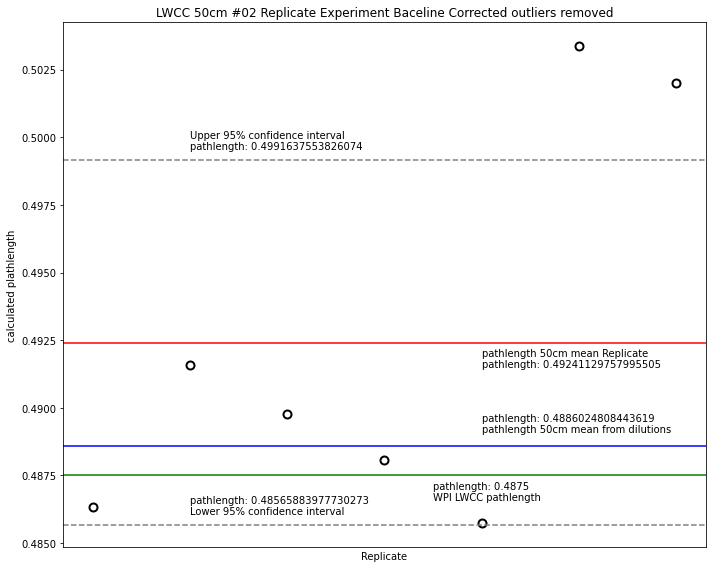

In [40]:
#without outlyers
df = dft.add_prefix('a')
df["plath_L"] = df["a550"] * 2.303 / abs_50

var = 1
z = np.abs(stats.zscore(df["plath_L"]))
test = z.abs()<var
test = test[test==False]
df = df.drop(test.index)

plath_L = df['plath_L']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_50cm_rep_BC_outrem = np.mean(plath_L)
CI_lower_50cm_rep_BC_outrem = CI_lower
CI_upper_50cm_rep_BC_outrem = CI_upper

fig, ax = plt.subplots(figsize=(10,8))
ax.plot( plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(1,CI_lower+.0004,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_lower+.0008,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(1,CI_upper+.0008,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_upper+.0004,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(4,np.mean(plath_L)-.0009,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(4,np.mean(plath_L)-.0005,"pathlength 50cm mean Replicate", fontsize=10, ha='left')

ax.axhline(y=pathlength_50cm_02, c='blue')
ax.text(4,pathlength_50cm_02+.0009,f"pathlength: {pathlength_50cm_02}", fontsize=10, ha='left')
ax.text(4,pathlength_50cm_02+.0005,"pathlength 50cm mean from dilutions", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_50_02), c='green')
ax.text(3.5,WPI_LWCC_50_02-.0009,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(3.5,WPI_LWCC_50_02-.0005,f"pathlength: {WPI_LWCC_50_02}", fontsize=10, ha='left')

ax.set_xlabel("Replicate")
ax.set_ylabel("calculated plathlength")
ax.set_title("LWCC 50cm #02 Replicate Experiment Baceline Corrected outliers removed")
ax.set_xticks([])
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_50cm_#02_Replicate_Experiment_plathlength_BC_outrem.png')

In [41]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA/Screw_and_unskrew/LWCC_10cm*.txt')

frames = []
for f in files:
    df = GET_DATA_BC_WPI(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index

df = df[(df['wl']>=370) & (df['wl']<=651)]
dft = df.T
dft = dft.drop(['wl'], axis=0)
df = df*2.303/WPI_LWCC_10
df['wl'] = df.index

df2 = df.drop(['wl'], axis=1)

mean_10cm_bc = df2.mean(axis=1)
SD_10cm_bc = df2.std(axis=1)
SE_10cm_bc = df2.sem(axis=1)
MAD_10cm_bc = df2.mad(axis=1)

C:\Users\12532\AppData\Local\Temp\ipykernel_18976\2820438125.py:45: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


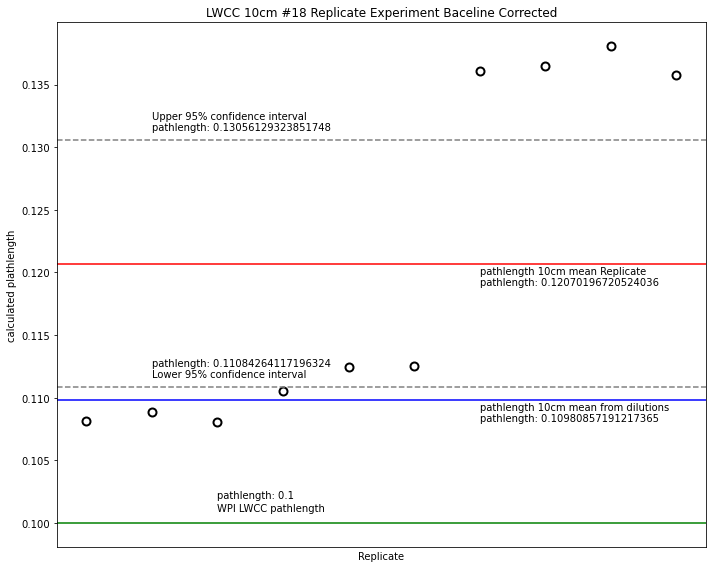

In [42]:
#pathlegth calculations 
df = dft.add_prefix('a')
df["plath_L"] = df["a550"] * 2.303 / abs_50

#plot resuts 
plath_L = df['plath_L']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_10cm_rep_BC = np.mean(plath_L)
CI_lower_10cm_rep_BC = CI_lower
CI_upper_10cm_rep_BC = CI_upper

fig, ax = plt.subplots(figsize=(10,8))
ax.plot( plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(1,CI_lower+.0008,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_lower+.0017,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(1,CI_upper+.0017,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_upper+.0008,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(6,np.mean(plath_L)-.0017,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(6,np.mean(plath_L)-.0008,"pathlength 10cm mean Replicate", fontsize=10, ha='left')

ax.axhline(y=pathlength_10cm_a, c='blue')
ax.text(6,pathlength_10cm_a-.0017,f"pathlength: {pathlength_10cm_a}", fontsize=10, ha='left')
ax.text(6,pathlength_10cm_a-.0008,"pathlength 10cm mean from dilutions", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_10), c='green')
ax.text(2,WPI_LWCC_10+.0009,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(2,WPI_LWCC_10+.0020,f"pathlength: {WPI_LWCC_10}", fontsize=10, ha='left')

ax.set_xlabel("Replicate")
ax.set_ylabel("calculated plathlength")
ax.set_title("LWCC 10cm #18 Replicate Experiment Baceline Corrected")
ax.set_xticks([])
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_10cm_Replicate_Experiment_plathlength_BC.png')

C:\Users\12532\AppData\Local\Temp\ipykernel_18976\2333835226.py:51: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


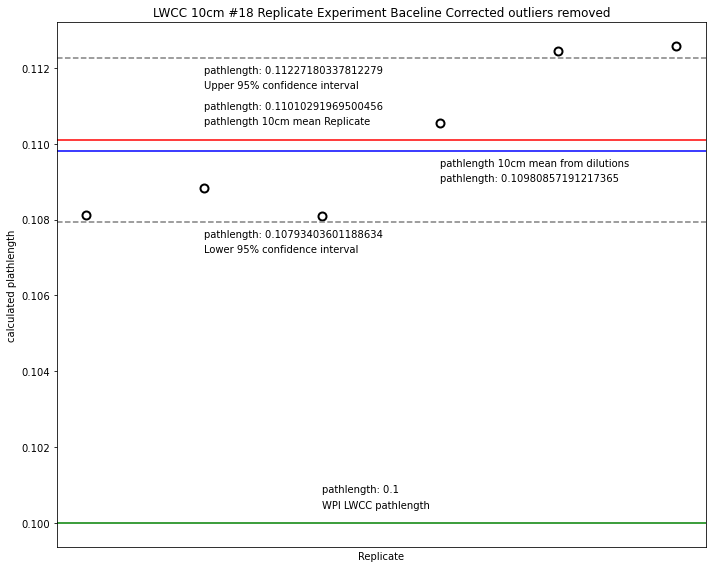

In [43]:
#without outlyers
df = dft.add_prefix('a')
df["plath_L"] = df["a550"] * 2.303 / abs_50

var = 1
z = np.abs(stats.zscore(df["plath_L"]))
test = z.abs()<var
test = test[test==False]
df = df.drop(test.index)

plath_L = df['plath_L']

pathlength_10cm_rep_BC_outrem  = np.mean(plath_L)

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

CI_lower_10cm_rep_BC_outrem = CI_lower
CI_upper_10cm_rep_BC_outrem  = CI_upper

fig, ax = plt.subplots(figsize=(10,8))
ax.plot( plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(1,CI_lower-.0008,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_lower-.0004,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(1,CI_upper-.0008,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_upper-.0004,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(1,np.mean(plath_L)+.0008,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(1,np.mean(plath_L)+.0004,"pathlength 10cm mean Replicate", fontsize=10, ha='left')

ax.axhline(y=pathlength_10cm_a, c='blue')
ax.text(3,pathlength_10cm_a-.0008,f"pathlength: {pathlength_10cm_a}", fontsize=10, ha='left')
ax.text(3,pathlength_10cm_a-.0004,"pathlength 10cm mean from dilutions", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_10), c='green')
ax.text(2,WPI_LWCC_10+.0004,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(2,WPI_LWCC_10+.0008,f"pathlength: {WPI_LWCC_10}", fontsize=10, ha='left')

ax.set_xlabel("Replicate")
ax.set_ylabel("calculated plathlength")
ax.set_title("LWCC 10cm #18 Replicate Experiment Baceline Corrected outliers removed")
ax.set_xticks([])
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_10cm_Replicate_Experiment_plathlength_BC_outrem.png')

In [44]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA/Screw_and_unskrew/LWCC_5cm*.txt')

frames = []
for f in files:
    df = GET_DATA_BC_WPI(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index

df = df[(df['wl']>=370) & (df['wl']<=651)]
dft = df.T
dft = dft.drop(['wl'], axis=0)
df = df*2.303/WPI_LWCC_5
df['wl'] = df.index

df2 = df.drop(['wl'], axis=1)

mean_5cm_bc = df2.mean(axis=1)
SD_5cm_bc = df2.std(axis=1)
SE_5cm_bc = df2.sem(axis=1)
MAD_5cm_bc = df2.mad(axis=1)

C:\Users\12532\AppData\Local\Temp\ipykernel_18976\2395073647.py:45: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


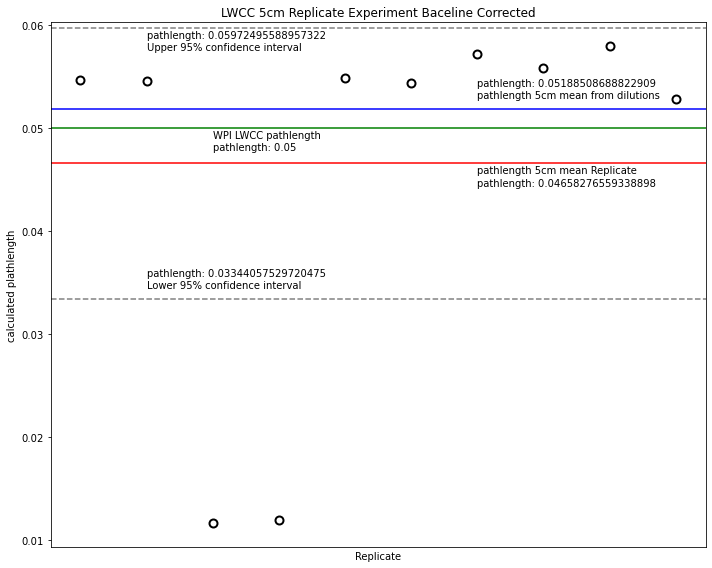

In [45]:
#pathlegth calculations 
df = dft.add_prefix('a')
df["plath_L"] = df["a550"] * 2.303 / abs_50

#plot resuts 
plath_L = df['plath_L']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_5cm_rep_BC = np.mean(plath_L)
CI_lower_5cm_rep_BC = CI_lower
CI_upper_5cm_rep_BC = CI_upper

fig, ax = plt.subplots(figsize=(10,8))
ax.plot( plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(1,CI_lower+.001,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_lower+.0022,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(1,CI_upper-.0022,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_upper-.001,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(6,np.mean(plath_L)-.0022,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(6,np.mean(plath_L)-.001,"pathlength 5cm mean Replicate", fontsize=10, ha='left')

ax.axhline(y=pathlength_5cm_a, c='blue')
ax.text(6,pathlength_5cm_a+.0022,f"pathlength: {pathlength_5cm_a}", fontsize=10, ha='left')
ax.text(6,pathlength_5cm_a+.001,"pathlength 5cm mean from dilutions", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_5), c='green')
ax.text(2,WPI_LWCC_5-.001,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(2,WPI_LWCC_5-.0022,f"pathlength: {WPI_LWCC_5}", fontsize=10, ha='left')

ax.set_xlabel("Replicate")
ax.set_ylabel("calculated plathlength")
ax.set_title("LWCC 5cm Replicate Experiment Baceline Corrected")
ax.set_xticks([])
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_5cm_Replicate_Experiment_plathlength_BC.png')

C:\Users\12532\AppData\Local\Temp\ipykernel_18976\517940595.py:50: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


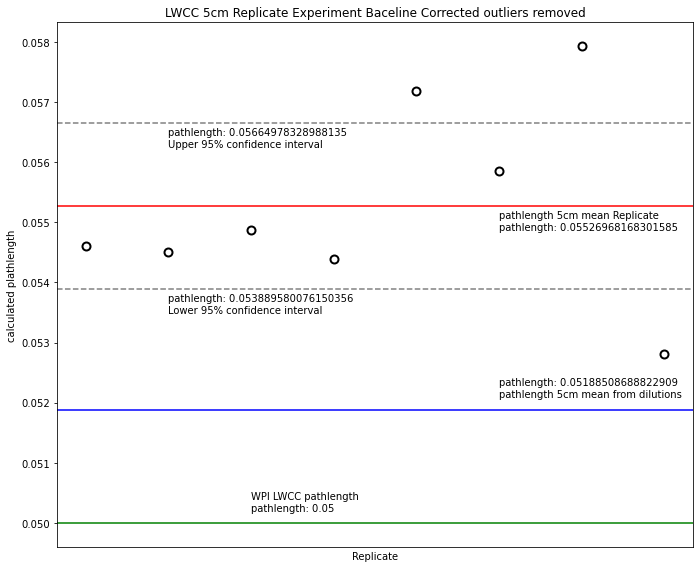

In [46]:
#without outlyers
df = dft.add_prefix('a')
df["plath_L"] = df["a550"] * 2.303 / abs_50

var = 1
z = np.abs(stats.zscore(df["plath_L"]))
test = z.abs()<var
test = test[test==False]
df = df.drop(test.index)

plath_L = df['plath_L']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_5cm_rep_BC_outrem = np.mean(plath_L)
CI_lower_5cm_rep_BC_outrem = CI_lower
CI_upper_5cm_rep_BC_outrem = CI_upper

fig, ax = plt.subplots(figsize=(10,8))
ax.plot( plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(1,CI_lower-.0004,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_lower-.0002,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(1,CI_upper-.0004,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_upper-.0002,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(5,np.mean(plath_L)-.0004,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(5,np.mean(plath_L)-.0002,"pathlength 5cm mean Replicate", fontsize=10, ha='left')

ax.axhline(y=pathlength_5cm_a, c='blue')
ax.text(5,pathlength_5cm_a+.0004,f"pathlength: {pathlength_5cm_a}", fontsize=10, ha='left')
ax.text(5,pathlength_5cm_a+.0002,"pathlength 5cm mean from dilutions", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_5), c='green')
ax.text(2,WPI_LWCC_5+.0004,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(2,WPI_LWCC_5+.0002,f"pathlength: {WPI_LWCC_5}", fontsize=10, ha='left')

ax.set_xlabel("Replicate")
ax.set_ylabel("calculated plathlength")
ax.set_title("LWCC 5cm Replicate Experiment Baceline Corrected outliers removed")
ax.set_xticks([])
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_5cm_Replicate_Experiment_plathlength_BC_outrem.png')

In [47]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA/Screw_and_unskrew/LWCC_50cm*.txt')

frames = []
for f in files:
    df = GET_DATA_WPI(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index

df = df[(df['wl']>=370) & (df['wl']<=651)]
dft = df.T
dft = dft.drop(['wl'], axis=0)
df = df*2.303/WPI_LWCC_50_02
df['wl'] = df.index

df2 = df.drop(['wl'], axis=1)

mean_50cm = df2.mean(axis=1)
SD_50cm = df2.std(axis=1)
SE_50cm = df2.sem(axis=1)
MAD_50cm = df2.mad(axis=1)

C:\Users\12532\AppData\Local\Temp\ipykernel_18976\1425318873.py:45: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


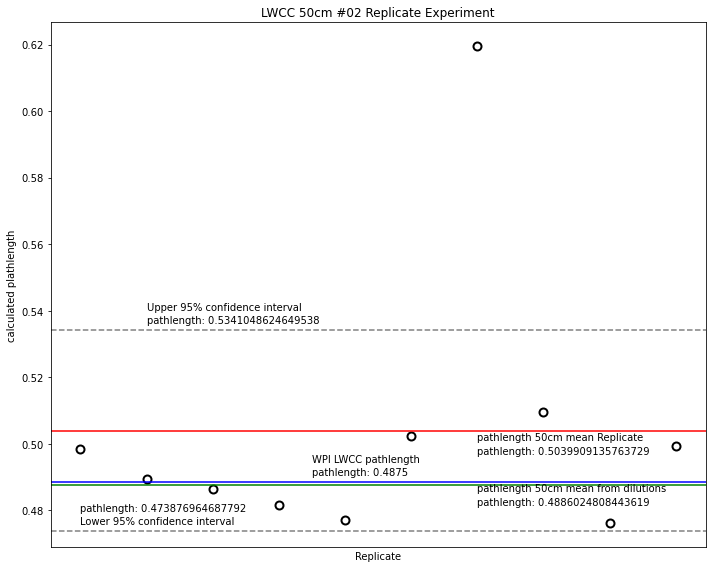

In [48]:
#pathlegth calculations 
df = dft.add_prefix('a')
df["plath_L"] = df["a550"] * 2.303 / abs_50

#plot resuts 
plath_L = df['plath_L']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_50cm_rep = np.mean(plath_L)
CI_lower_50cm_rep = CI_lower
CI_upper_50cm_rep = CI_upper

fig, ax = plt.subplots(figsize=(10,8))
ax.plot( plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(0,CI_lower+.002,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(0,CI_lower+.006,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(1,CI_upper+.006,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_upper+.002,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(6,np.mean(plath_L)-.007,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(6,np.mean(plath_L)-.003,"pathlength 50cm mean Replicate", fontsize=10, ha='left')

ax.axhline(y=pathlength_50cm_02, c='blue')
ax.text(6,pathlength_50cm_02-.007,f"pathlength: {pathlength_50cm_02}", fontsize=10, ha='left')
ax.text(6,pathlength_50cm_02-.003,"pathlength 50cm mean from dilutions", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_50_02), c='green')
ax.text(3.5,WPI_LWCC_50_02+.007,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(3.5,WPI_LWCC_50_02+.003,f"pathlength: {WPI_LWCC_50_02}", fontsize=10, ha='left')

ax.set_xlabel("Replicate")
ax.set_ylabel("calculated plathlength")
ax.set_title("LWCC 50cm #02 Replicate Experiment")
ax.set_xticks([])
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_50cm_#02_Replicate_Experiment_plathlength.png')

C:\Users\12532\AppData\Local\Temp\ipykernel_18976\2489868724.py:51: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


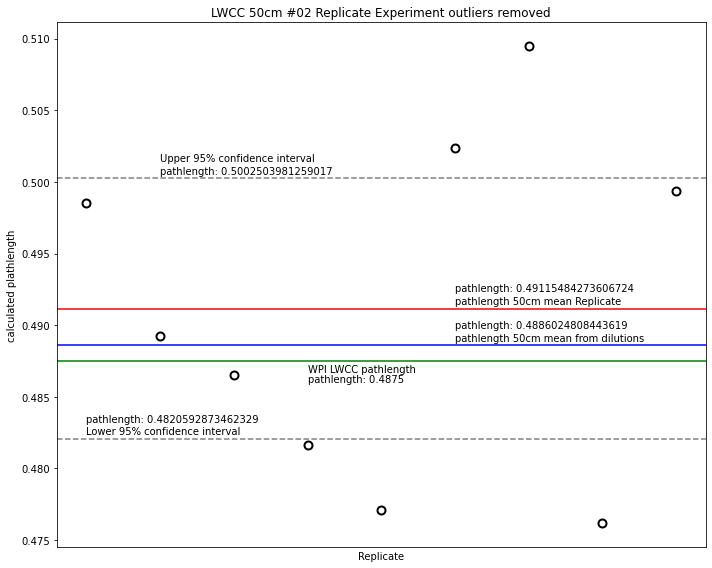

In [49]:
#without outlyers
df = dft.add_prefix('a')
df["plath_L"] = df["a550"] * 2.303 / abs_50

var = 1
z = np.abs(stats.zscore(df["plath_L"]))
test = z.abs()<var
test = test[test==False]
df = df.drop(test.index)

#plot resuts 
plath_L = df['plath_L']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_50cm_rep_outrem = np.mean(plath_L)
CI_lower_50cm_rep_outrem = CI_lower
CI_upper_50cm_rep_outrem = CI_upper

fig, ax = plt.subplots(figsize=(10,8))
ax.plot( plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(0,CI_lower+.0003,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(0,CI_lower+.0012,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(1,CI_upper+.0012,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_upper+.0003,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(5,np.mean(plath_L)+.0012,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(5,np.mean(plath_L)+.0003,"pathlength 50cm mean Replicate", fontsize=10, ha='left')

ax.axhline(y=pathlength_50cm_02, c='blue')
ax.text(5,pathlength_50cm_02+.0012,f"pathlength: {pathlength_50cm_02}", fontsize=10, ha='left')
ax.text(5,pathlength_50cm_02+.0003,"pathlength 50cm mean from dilutions", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_50_02), c='green')
ax.text(3,WPI_LWCC_50_02-.0008,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(3,WPI_LWCC_50_02-.0015,f"pathlength: {WPI_LWCC_50_02}", fontsize=10, ha='left')

ax.set_xlabel("Replicate")
ax.set_ylabel("calculated plathlength")
ax.set_title("LWCC 50cm #02 Replicate Experiment outliers removed")
ax.set_xticks([])
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_50cm_#02_Replicate_Experiment_plathlength_outrem.png')

In [50]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA/Screw_and_unskrew/LWCC_10cm*.txt')

frames = []
for f in files:
    df = GET_DATA_WPI(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index

df = df[(df['wl']>=370) & (df['wl']<=651)]
dft = df.T
dft = dft.drop(['wl'], axis=0)
df = df*2.303/WPI_LWCC_10
df['wl'] = df.index

df2 = df.drop(['wl'], axis=1)

mean_10cm = df2.mean(axis=1)
SD_10cm = df2.std(axis=1)
SE_10cm = df2.sem(axis=1)
MAD_10cm = df2.mad(axis=1)

C:\Users\12532\AppData\Local\Temp\ipykernel_18976\1297720236.py:45: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


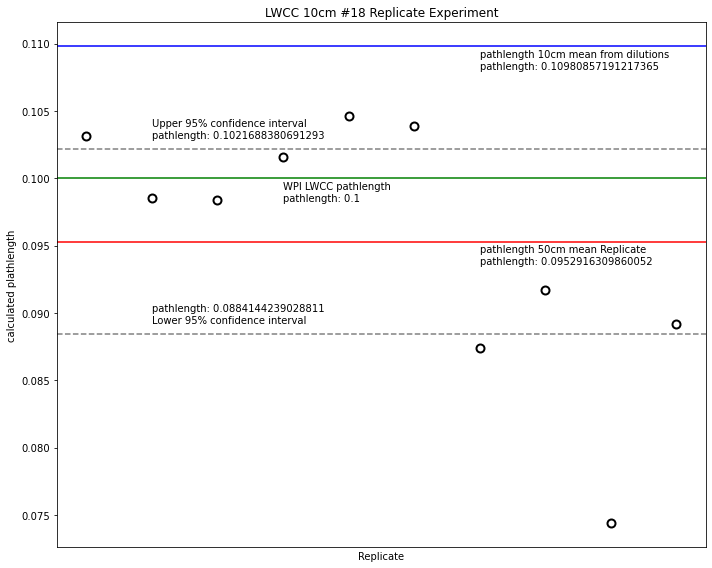

In [51]:
#pathlegth calculations 
df = dft.add_prefix('a')
df["plath_L"] = df["a550"] * 2.303 / abs_50

#plot resuts 
plath_L = df['plath_L']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_10cm_rep = np.mean(plath_L)
CI_lower_10cm_rep = CI_lower
CI_upper_10cm_rep = CI_upper

fig, ax = plt.subplots(figsize=(10,8))
ax.plot( plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(1,CI_lower+.0008,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_lower+.0017,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(1,CI_upper+.0017,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_upper+.0008,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(6,np.mean(plath_L)-.0017,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(6,np.mean(plath_L)-.0008,"pathlength 50cm mean Replicate", fontsize=10, ha='left')

ax.axhline(y=pathlength_10cm_a, c='blue')
ax.text(6,pathlength_10cm_a-.0017,f"pathlength: {pathlength_10cm_a}", fontsize=10, ha='left')
ax.text(6,pathlength_10cm_a-.0008,"pathlength 10cm mean from dilutions", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_10), c='green')
ax.text(3,WPI_LWCC_10-.0008,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(3,WPI_LWCC_10-.0017,f"pathlength: {WPI_LWCC_10}", fontsize=10, ha='left')

ax.set_xlabel("Replicate")
ax.set_ylabel("calculated plathlength")
ax.set_title("LWCC 10cm #18 Replicate Experiment")
ax.set_xticks([])
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_10cm_Replicate_Experiment_plathlength.png')

C:\Users\12532\AppData\Local\Temp\ipykernel_18976\4116044699.py:51: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


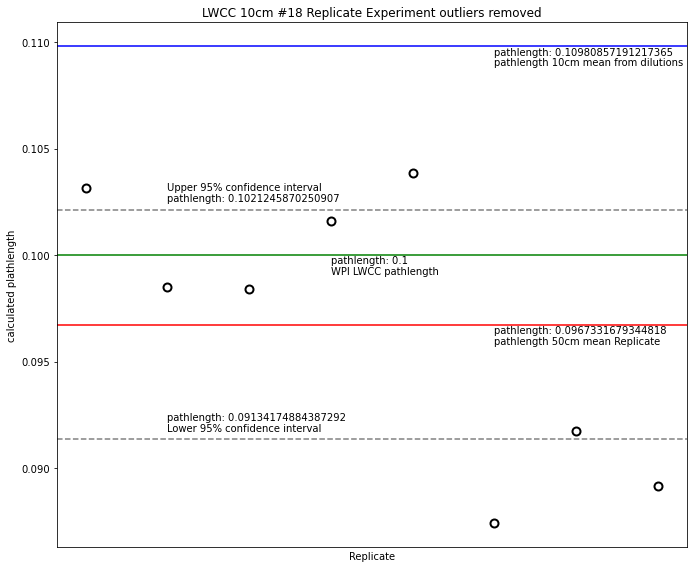

In [52]:
#without outlyers
df = dft.add_prefix('a')
df["plath_L"] = df["a550"] * 2.303 / abs_50

var = 1
z = np.abs(stats.zscore(df["plath_L"]))
test = z.abs()<var
test = test[test==False]
df = df.drop(test.index)

#plot resuts 
plath_L = df['plath_L']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_10cm_rep_outrem = np.mean(plath_L)
CI_lower_10cm_rep_outrem = CI_lower
CI_upper_10cm_rep_outrem = CI_upper

fig, ax = plt.subplots(figsize=(10,8))
ax.plot( plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(1,CI_lower+.0004,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_lower+.0009,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(1,CI_upper+.0009,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_upper+.0004,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(5,np.mean(plath_L)-.0004,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(5,np.mean(plath_L)-.0009,"pathlength 50cm mean Replicate", fontsize=10, ha='left')

ax.axhline(y=pathlength_10cm_a, c='blue')
ax.text(5,pathlength_10cm_a-.0004,f"pathlength: {pathlength_10cm_a}", fontsize=10, ha='left')
ax.text(5,pathlength_10cm_a-.0009,"pathlength 10cm mean from dilutions", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_10), c='green')
ax.text(3,WPI_LWCC_10-.0009,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(3,WPI_LWCC_10-.0004,f"pathlength: {WPI_LWCC_10}", fontsize=10, ha='left')

ax.set_xlabel("Replicate")
ax.set_ylabel("calculated plathlength")
ax.set_title("LWCC 10cm #18 Replicate Experiment outliers removed")
ax.set_xticks([])
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_10cm_Replicate_Experiment_plathlength_outrem.png')

In [53]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA/Screw_and_unskrew/LWCC_5cm*.txt')

frames = []
for f in files:
    df = GET_DATA_WPI(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index

df = df[(df['wl']>=370) & (df['wl']<=651)]
dft = df.T
dft = dft.drop(['wl'], axis=0)
df = df*2.303/WPI_LWCC_5
df['wl'] = df.index

df2 = df.drop(['wl'], axis=1)

mean_5cm = df2.mean(axis=1)
SD_5cm = df2.std(axis=1)
SE_5cm = df2.sem(axis=1)
MAD_5cm = df2.mad(axis=1)

C:\Users\12532\AppData\Local\Temp\ipykernel_18976\4114310506.py:45: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


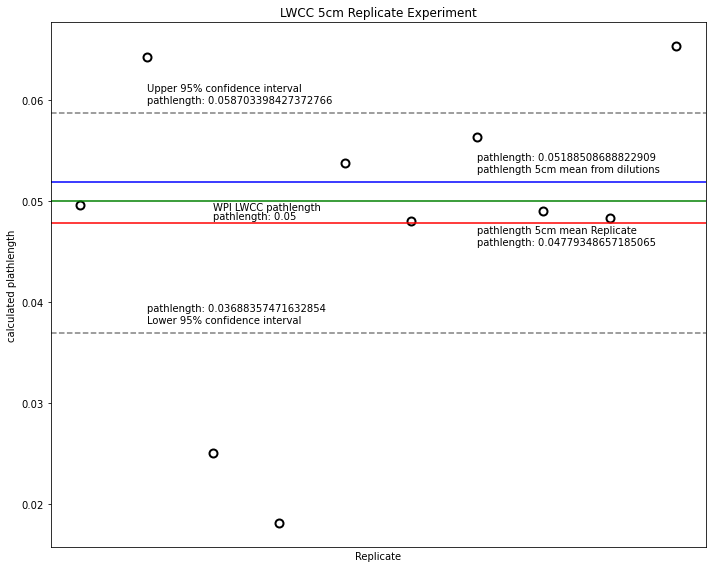

In [54]:
#pathlegth calculations 
df = dft.add_prefix('a')
df["plath_L"] = df["a550"] * 2.303 / abs_50

#plot resuts 
plath_L = df['plath_L']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_5cm_rep = np.mean(plath_L)
CI_lower_5cm_rep = CI_lower
CI_upper_5cm_rep = CI_upper

fig, ax = plt.subplots(figsize=(10,8))
ax.plot( plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(1,CI_lower+.001,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_lower+.0022,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(1,CI_upper+.0022,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_upper+.001,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(6,np.mean(plath_L)-.0022,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(6,np.mean(plath_L)-.001,"pathlength 5cm mean Replicate", fontsize=10, ha='left')

ax.axhline(y=pathlength_5cm_a, c='blue')
ax.text(6,pathlength_5cm_a+.0022,f"pathlength: {pathlength_5cm_a}", fontsize=10, ha='left')
ax.text(6,pathlength_5cm_a+.001,"pathlength 5cm mean from dilutions", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_5), c='green')
ax.text(2,WPI_LWCC_5-.0009,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(2,WPI_LWCC_5-.0018,f"pathlength: {WPI_LWCC_5}", fontsize=10, ha='left')

ax.set_xlabel("Replicate")
ax.set_ylabel("calculated plathlength")
ax.set_title("LWCC 5cm Replicate Experiment")
ax.set_xticks([])
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_5cm_Replicate_Experiment_plathlength.png')

C:\Users\12532\AppData\Local\Temp\ipykernel_18976\2224270768.py:51: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


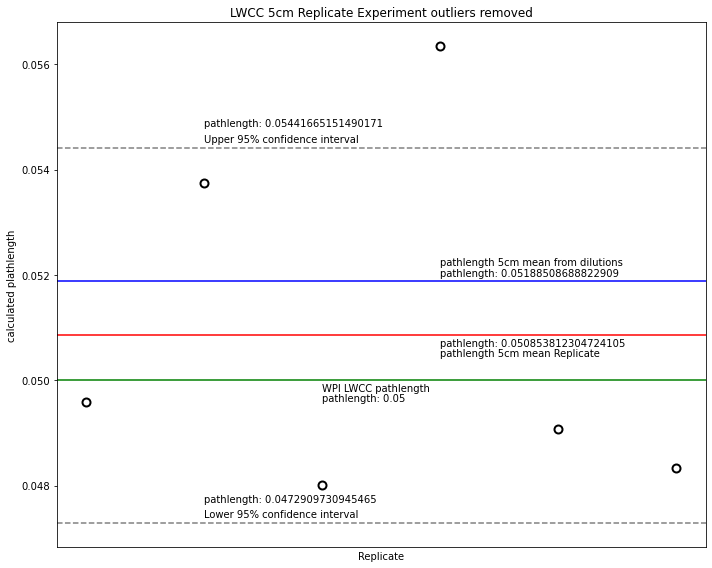

In [55]:
#without outlyers
df = dft.add_prefix('a')
df["plath_L"] = df["a550"] * 2.303 / abs_50

var = 1
z = np.abs(stats.zscore(df["plath_L"]))
test = z.abs()<var
test = test[test==False]
df = df.drop(test.index)

#plot resuts 
plath_L = df['plath_L']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_5cm_rep_outrem = np.mean(plath_L)
CI_lower_5cm_rep_outrem = CI_lower
CI_upper_5cm_rep_outrem = CI_upper

fig, ax = plt.subplots(figsize=(10,8))
ax.plot( plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(1,CI_lower+.0001,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_lower+.0004,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(1,CI_upper+.0001,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(1,CI_upper+.0004,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(3,np.mean(plath_L)-.0002,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(3,np.mean(plath_L)-.0004,"pathlength 5cm mean Replicate", fontsize=10, ha='left')

ax.axhline(y=pathlength_5cm_a, c='blue')
ax.text(3,pathlength_5cm_a+.0001,f"pathlength: {pathlength_5cm_a}", fontsize=10, ha='left')
ax.text(3,pathlength_5cm_a+.0003,"pathlength 5cm mean from dilutions", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_5), c='green')
ax.text(2,WPI_LWCC_5-.0002,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(2,WPI_LWCC_5-.0004,f"pathlength: {WPI_LWCC_5}", fontsize=10, ha='left')

ax.set_xlabel("Replicate")
ax.set_ylabel("calculated plathlength")
ax.set_title("LWCC 5cm Replicate Experiment outliers removed")
ax.set_xticks([])
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCC_5cm_Replicate_Experiment_plathlength_outrem.png')

In [56]:
d = {'50cm_#02': pathlength_50cm_rep, 
    '50cm_#02_BC': pathlength_50cm_rep_BC, 
    '10cm': pathlength_10cm_rep,
    '10cm_BC': pathlength_10cm_rep_BC, 
    '5cm': pathlength_5cm_rep,
    '5cm_BC': pathlength_5cm_rep_BC, 
    '50cm_#02_outrem': pathlength_50cm_rep_outrem, 
    '50cm_#02_BC_outrem': pathlength_50cm_rep_BC_outrem, 
    '10cm_outrem': pathlength_10cm_rep_outrem,
    '10cm_BC_outrem': pathlength_10cm_rep_BC_outrem, 
    '5cm_outrem': pathlength_5cm_rep_outrem,
    '5cm_BC_outrem': pathlength_5cm_rep_BC_outrem}
pathlength_data = pd.DataFrame(d, index = ['meters'])
pathlength_data = pathlength_data.T
pathlength_data["CI_lower"] = [CI_lower_50cm_rep, CI_lower_50cm_rep_BC, 
                               CI_lower_10cm_rep, CI_lower_10cm_rep_BC, 
                               CI_lower_5cm_rep, CI_lower_5cm_rep_BC,
                               CI_lower_50cm_rep_outrem, CI_lower_50cm_rep_BC_outrem, 
                               CI_lower_10cm_rep_outrem, CI_lower_10cm_rep_BC_outrem, 
                               CI_lower_5cm_rep_outrem, CI_lower_5cm_rep_BC_outrem,]
pathlength_data["CI_upper"] = [CI_upper_50cm_rep, CI_upper_50cm_rep_BC, 
                               CI_upper_10cm_rep, CI_upper_10cm_rep_BC, 
                               CI_upper_5cm_rep, CI_upper_5cm_rep_BC, 
                               CI_upper_50cm_rep_outrem, CI_upper_50cm_rep_BC_outrem, 
                               CI_upper_10cm_rep_outrem, CI_upper_10cm_rep_BC_outrem, 
                               CI_upper_5cm_rep_outrem, CI_upper_5cm_rep_BC_outrem]

pathlength_data.to_csv('../../../CDOM_DATA/PATHLENGTH_DATA/pathlength_data_reps.csv')

pathlength_data

meters  CI_lower  CI_upper
50cm_#02            0.503991  0.473877  0.534105
50cm_#02_BC         0.494557  0.486732  0.502382
10cm                0.095292  0.088414  0.102169
10cm_BC             0.120702  0.110843  0.130561
5cm                 0.047793  0.036884  0.058703
5cm_BC              0.046583  0.033441  0.059725
50cm_#02_outrem     0.491155  0.482059  0.500250
50cm_#02_BC_outrem  0.492411  0.485659  0.499164
10cm_outrem         0.096733  0.091342  0.102125
10cm_BC_outrem      0.110103  0.107934  0.112272
5cm_outrem          0.050854  0.047291  0.054417
5cm_BC_outrem       0.055270  0.053890  0.056650

In [57]:
pathlength_data_all = pd.concat([pathlength_data_cal, pathlength_data])
pathlength_data_all.to_csv('../../../CDOM_DATA/PATHLENGTH_DATA/pathlength_data.csv')
pathlength_data_all

meters  CI_lower  CI_upper
50cm_#01_curve      0.492475  0.482993  0.501956
50cm_#02_curve      0.488602  0.480975  0.496230
50cm_#03_curve      0.490423  0.479692  0.501153
10cm_a_curve        0.109809  0.102394  0.117223
10cm_b_curve        0.104576  0.098946  0.110206
5cm_a_curve         0.051885  0.044562  0.059208
5cm_b_curve         0.052630  0.050380  0.054880
50cm_#02            0.503991  0.473877  0.534105
50cm_#02_BC         0.494557  0.486732  0.502382
10cm                0.095292  0.088414  0.102169
10cm_BC             0.120702  0.110843  0.130561
5cm                 0.047793  0.036884  0.058703
5cm_BC              0.046583  0.033441  0.059725
50cm_#02_outrem     0.491155  0.482059  0.500250
50cm_#02_BC_outrem  0.492411  0.485659  0.499164
10cm_outrem         0.096733  0.091342  0.102125
10cm_BC_outrem      0.110103  0.107934  0.112272
5cm_outrem          0.050854  0.047291  0.054417
5cm_BC_outrem       0.055270  0.053890  0.056650

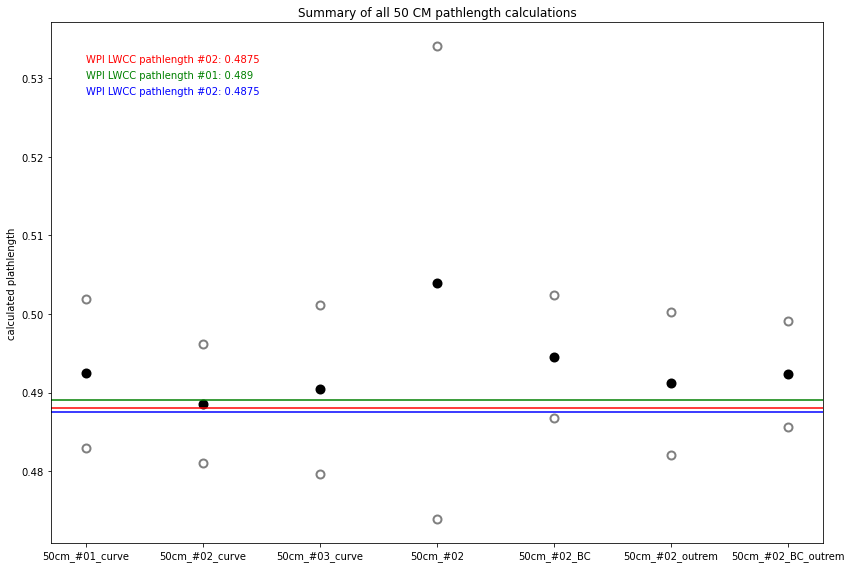

In [58]:
pathlength_data_50cm = pathlength_data_all.iloc[[0,1,2,7,8,13,14]]
meters = pathlength_data_50cm["meters"]
CI_lower = pathlength_data_50cm["CI_lower"]
CI_upper = pathlength_data_50cm["CI_upper"]

meters_mean = meters.mean()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot( meters, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='black',
         markeredgecolor='black',
         markeredgewidth=2)
ax.plot( CI_lower, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='grey',
         markeredgewidth=2)
ax.plot( CI_upper, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='grey',
         markeredgewidth=2)

ax.axhline(y=np.mean(WPI_LWCC_50_01), c='green')
ax.text(0,.53,f"WPI LWCC pathlength #01: {WPI_LWCC_50_01}", fontsize=10, ha='left', c="green")

ax.axhline(y=np.mean(WPI_LWCC_50_02), c='blue')
ax.text(0,.528,f"WPI LWCC pathlength #02: {WPI_LWCC_50_02}", fontsize=10, ha='left', c="blue")

ax.axhline(y=np.mean(WPI_LWCC_50_03), c='red')
ax.text(0,.532,f"WPI LWCC pathlength #02: {WPI_LWCC_50_02}", fontsize=10, ha='left', c="red")

ax.set_xlabel("")
ax.set_ylabel("calculated plathlength")
ax.set_title("Summary of all 50 CM pathlength calculations")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/Summary_50cm_pathlength_calculations.png')

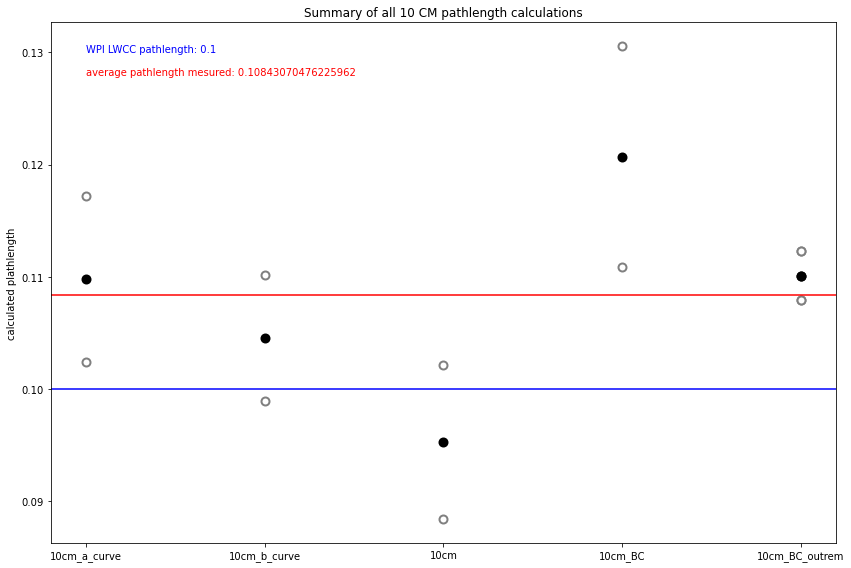

In [59]:
pathlength_data_10cm = pathlength_data_all.iloc[[3,4,9,10,16,16]]
meters = pathlength_data_10cm["meters"]
CI_lower = pathlength_data_10cm["CI_lower"]
CI_upper = pathlength_data_10cm["CI_upper"]

meters_mean = meters.mean()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot( meters, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='black',
         markeredgecolor='black',
         markeredgewidth=2)
ax.plot( CI_lower, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='grey',
         markeredgewidth=2)
ax.plot( CI_upper, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='grey',
         markeredgewidth=2)

ax.axhline(y=np.mean(WPI_LWCC_10), c='blue')
ax.text(0,.13,f"WPI LWCC pathlength: {WPI_LWCC_10}", fontsize=10, ha='left', c="blue")

ax.axhline(y=np.mean(meters_mean), c='red')
ax.text(0,.128,f"average pathlength mesured: {meters_mean}", fontsize=10, ha='left', c="red")

ax.set_xlabel("")
ax.set_ylabel("calculated plathlength")
ax.set_title("Summary of all 10 CM pathlength calculations")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/Summary_10cm_pathlength_calculations.png')

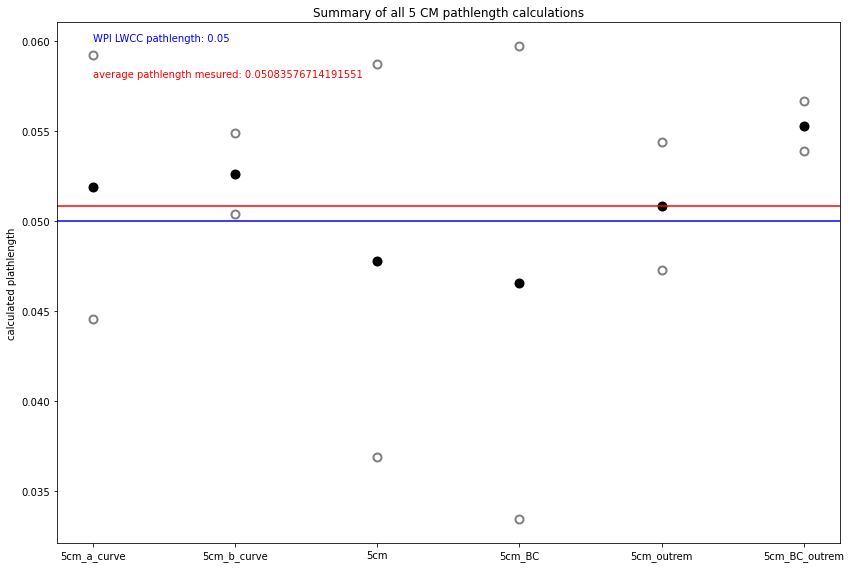

In [60]:
pathlength_data_5cm = pathlength_data_all.iloc[[5,6,11,12,17,18]]
meters = pathlength_data_5cm["meters"]
CI_lower = pathlength_data_5cm["CI_lower"]
CI_upper = pathlength_data_5cm["CI_upper"]

meters_mean = meters.mean()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot( meters, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='black',
         markeredgecolor='black',
         markeredgewidth=2)
ax.plot( CI_lower, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='grey',
         markeredgewidth=2)
ax.plot( CI_upper, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='grey',
         markeredgewidth=2)

ax.axhline(y=np.mean(WPI_LWCC_5), c='blue')
ax.text(0,.06,f"WPI LWCC pathlength: {WPI_LWCC_5}", fontsize=10, ha='left', c="blue")

ax.axhline(y=np.mean(meters_mean), c='red')
ax.text(0,.058,f"average pathlength mesured: {meters_mean}", fontsize=10, ha='left', c="red")

ax.set_xlabel("")
ax.set_ylabel("calculated plathlength")
ax.set_title("Summary of all 5 CM pathlength calculations")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/Summary_5cm_pathlength_calculations.png')

In [61]:
d = {'50_cm_mean': mean_50cm,
     '50_cm_mean_BC': mean_50cm_bc,
    '10_cm_mean': mean_10cm, 
    '10_cm_mean_bc': mean_10cm_bc,
    '5_cm_mean': mean_5cm,
    '5_cm_mean_bc': mean_5cm_bc,
    '50_cm_SD': SD_50cm,
    '50_cm_SD_bc': SD_50cm_bc,
    '10_cm_SD': SD_10cm,
    '10_cm_SD_bc': SD_10cm_bc,
    '5_cm_SD': SD_5cm, 
    '5_cm_SD_bc': SD_5cm_bc,
    '50_cm_SE': SE_50cm,
    '50_cm_SE_bc': SE_50cm_bc,
    '10_cm_SE': SE_10cm,
    '10_cm_SE_bc': SE_10cm_bc,
    '5_cm_SE': SE_5cm, 
    '5_cm_SE_bc': SE_5cm_bc, 
    '50_cm_MAD': MAD_50cm,
    '50_cm_MAD_bc': MAD_50cm_bc,
    '10_cm_MAD': MAD_10cm,
    '10_cm_MAD_bc': MAD_10cm_bc,
    '5_cm_MAD': MAD_5cm, 
    '5_cm_MAD_bc': MAD_5cm_bc}
pathlength_error_data = pd.DataFrame(d, index = df2.index)

pathlength_error_data.to_csv('../../../CDOM_DATA/PATHLENGTH_DATA/pathlength_error_data.csv')

pathlength_error_data

50_cm_mean  50_cm_mean_BC  10_cm_mean  10_cm_mean_bc  5_cm_mean  \
wl                                                                     
370    0.610259       0.571011    0.299601       0.814979   0.323803   
372    0.612199       0.572951    0.313243       0.828621   0.402491   
374    0.620170       0.580922    0.339921       0.855299   0.389365   
376    0.622278       0.583029    0.364824       0.880202   0.371861   
378    0.627744       0.588496    0.397876       0.913254   0.393270   
..          ...            ...         ...            ...        ...   
642    0.050035       0.010787   -0.311264       0.204114  -0.138287   
644    0.044824       0.005576   -0.297618       0.217760  -0.154484   
646    0.046628       0.007379   -0.325746       0.189631  -0.202671   
648    0.046379       0.007131   -0.274387       0.240991  -0.163500   
650    0.049107       0.009859   -0.309916       0.205462  -0.304302   

     5_cm_mean_bc  50_cm_SD  50_cm_SD_bc  10_cm_SD  10_cm_SD_bc  ...  \
wl                                                               ...   
370      0.274691  0.146985     0.016453  0.152704     0.333892  ...   
372      0.353378  0.146856     0.016788  0.140498     0.347318  ...   
374      0.340252  0.145306     0.015830  0.136409     0.355134  ...   
376      0.322749  0.146144     0.016288  0.123647     0.371507  ...   
378      0.344158  0.147958     0.016430  0.120572     0.385114  ...   
..            ...       ...          ...       ...          ...  ...   
642     -0.187399  0.145265     0.006669  0.253740     0.210327  ...   
644     -0.203596  0.146068     0.006686  0.232975     0.233509  ...   
646     -0.251783  0.145460     0.006084  0.241999     0.223293  ...   
648     -0.212612  0.146433     0.005709  0.194880     0.275401  ...   
650     -0.353414  0.145853     0.007829  0.234009     0.232659  ...   

     10_cm_SE  10_cm_SE_bc   5_cm_SE  5_cm_SE_bc  50_cm_MAD  50_cm_MAD_bc  \
wl                                                                          
370  0.048289     0.105586  0.120865    0.173946   0.083163      0.012758   
372  0.044429     0.109832  0.098218    0.144841   0.083126      0.013044   
374  0.043136     0.112303  0.100669    0.143533   0.082076      0.012581   
376  0.039101     0.117481  0.131835    0.182925   0.082535      0.013179   
378  0.038128     0.121784  0.129298    0.166736   0.083642      0.012674   
..        ...          ...       ...         ...        ...           ...   
642  0.080240     0.066511  0.128843    0.166982   0.081889      0.005306   
644  0.073673     0.073842  0.123502    0.157654   0.082608      0.005319   
646  0.076527     0.070612  0.131624    0.160694   0.082211      0.004859   
648  0.061626     0.087090  0.134870    0.166441   0.082525      0.003985   
650  0.074000     0.073573  0.180788    0.224841   0.082252      0.006141   

     10_cm_MAD  10_cm_MAD_bc  5_cm_MAD  5_cm_MAD_bc  
wl                                                   
370   0.107923      0.308310  0.302052     0.399451  
372   0.096887      0.320168  0.237990     0.339686  
374   0.093963      0.327414  0.233479     0.330441  
376   0.083567      0.342833  0.320931     0.425008  
378   0.084093      0.355545  0.287574     0.391066  
..         ...           ...       ...          ...  
642   0.218998      0.194984  0.282289     0.395650  
644   0.197371      0.216611  0.264795     0.373574  
646   0.206777      0.207205  0.285385     0.383211  
648   0.158444      0.255539  0.296330     0.396632  
650   0.198162      0.215820  0.399037     0.535212  

[141 rows x 24 columns]

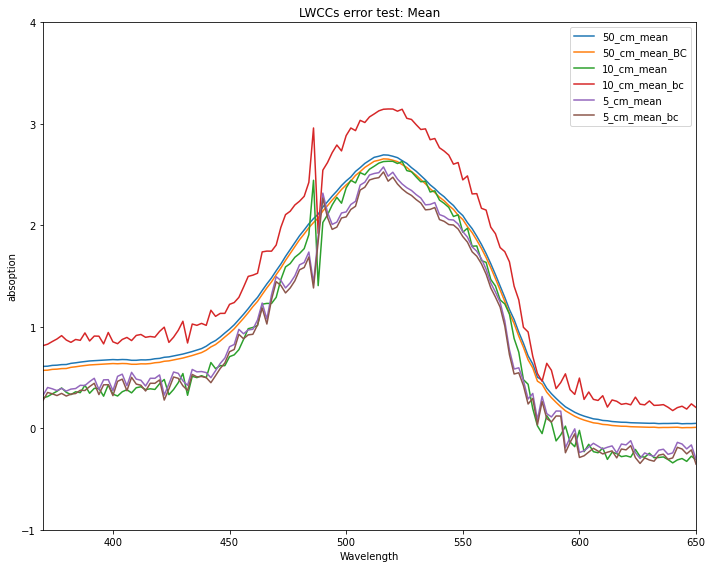

In [62]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK
d = {'50_cm_mean': mean_50cm,
     '50_cm_mean_BC': mean_50cm_bc,
    '10_cm_mean': mean_10cm, 
    '10_cm_mean_bc': mean_10cm_bc,
    '5_cm_mean': mean_5cm,
    '5_cm_mean_bc': mean_5cm_bc}
d = pd.DataFrame(d, index = df2.index)

fig, ax = plt.subplots(figsize=(10,8))
d.plot(label='', ax=ax)
ax.set_ylim(-1,4)
ax.set_xlim(370,650)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absoption")
ax.set_title("LWCCs error test: Mean")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCCs_error_test_mean.png')

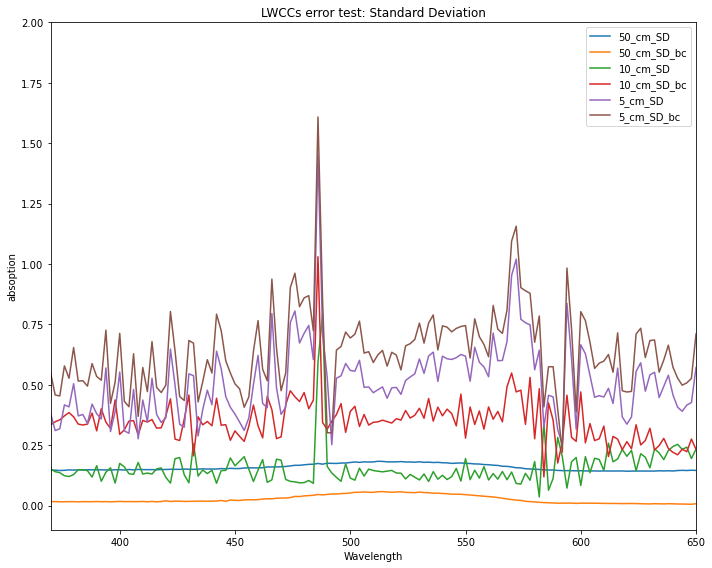

In [63]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK
d = {'50_cm_SD': SD_50cm,
    '50_cm_SD_bc': SD_50cm_bc,
    '10_cm_SD': SD_10cm,
    '10_cm_SD_bc': SD_10cm_bc,
    '5_cm_SD': SD_5cm, 
    '5_cm_SD_bc': SD_5cm_bc}
d = pd.DataFrame(d, index = df2.index)

fig, ax = plt.subplots(figsize=(10,8))
d.plot(label='', ax=ax)
ax.set_ylim(-.1,2)
ax.set_xlim(370,650)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absoption")
ax.set_title("LWCCs error test: Standard Deviation")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCCs_error_test_standard_deviation.png')

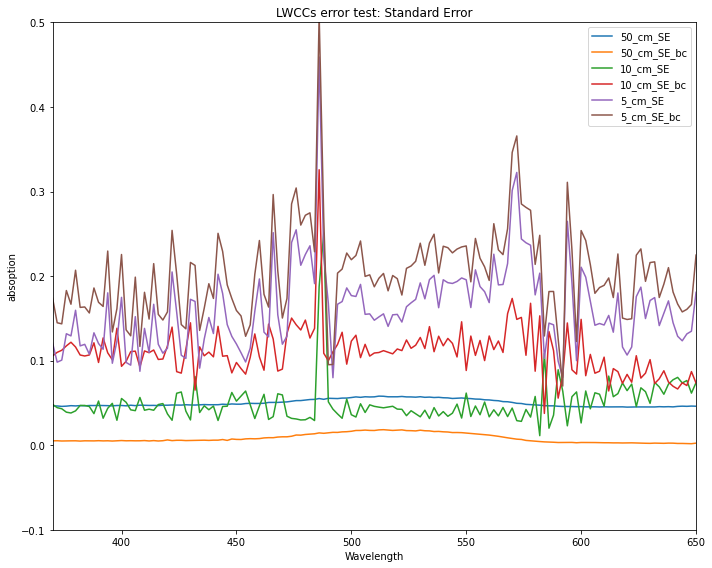

In [64]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK
d = {'50_cm_SE': SE_50cm,
    '50_cm_SE_bc': SE_50cm_bc,
    '10_cm_SE': SE_10cm,
    '10_cm_SE_bc': SE_10cm_bc,
    '5_cm_SE': SE_5cm, 
    '5_cm_SE_bc': SE_5cm_bc}
d = pd.DataFrame(d, index = df2.index)

fig, ax = plt.subplots(figsize=(10,8))
d.plot(label='', ax=ax)
ax.set_ylim(-.1,.5)
ax.set_xlim(370,650)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absoption")
ax.set_title("LWCCs error test: Standard Error")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCCs_error_test_standard_error.png')

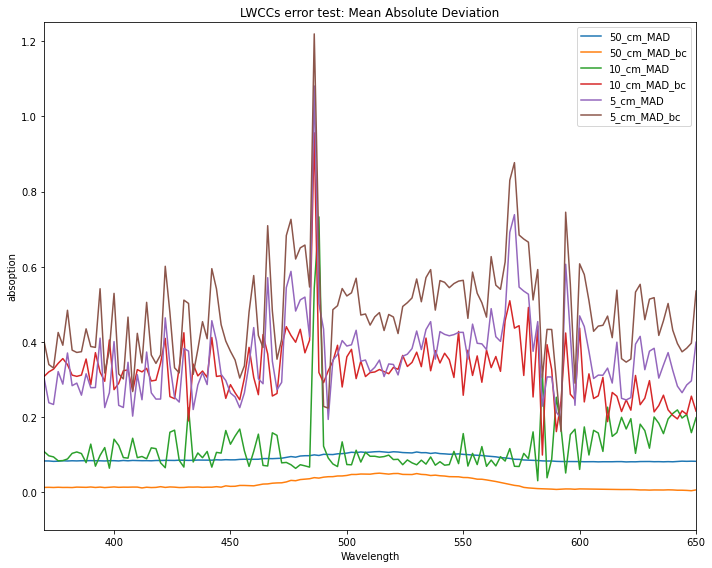

In [65]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK
d = {'50_cm_MAD': MAD_50cm,
    '50_cm_MAD_bc': MAD_50cm_bc,
    '10_cm_MAD': MAD_10cm,
    '10_cm_MAD_bc': MAD_10cm_bc,
    '5_cm_MAD': MAD_5cm, 
    '5_cm_MAD_bc': MAD_5cm_bc}
d = pd.DataFrame(d, index = df2.index)

fig, ax = plt.subplots(figsize=(10,8))
d.plot(label='', ax=ax)
ax.set_ylim(-.1,1.25)
ax.set_xlim(370,650)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absoption")
ax.set_title("LWCCs error test: Mean Absolute Deviation")
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCCs_error_test_Mean_Absolute_Deviation.png')

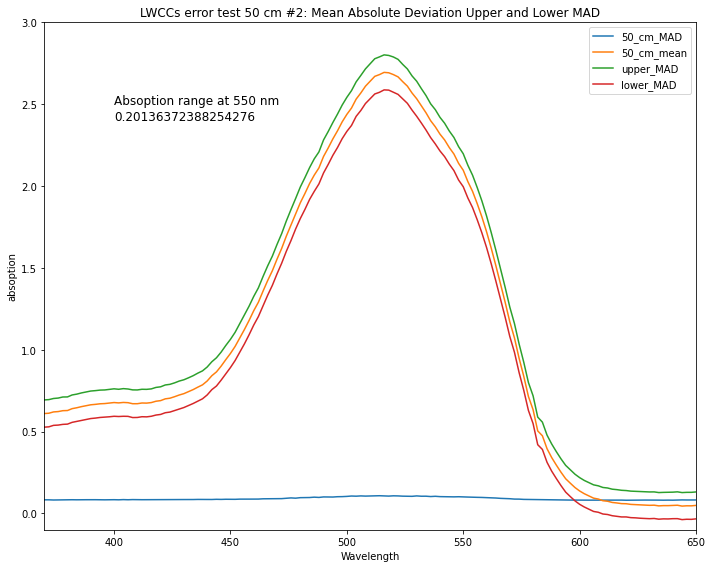

In [66]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF MEAN AND MAD
d = {'50_cm_MAD': MAD_50cm, 
    '50_cm_mean': mean_50cm}
d = pd.DataFrame(d, index = df2.index)

d["upper_MAD"] = d['50_cm_mean'] + d['50_cm_MAD']
d["lower_MAD"] = d['50_cm_mean'] - d['50_cm_MAD']

upper_mad = d["upper_MAD"]
lower_mad = d["lower_MAD"]

abs_range = upper_mad[550] - lower_mad[550]
abs_range

fig, ax = plt.subplots(figsize=(10,8))
d.plot(label='', ax=ax)
ax.set_ylim(-.1,3)
ax.set_xlim(370,650)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absoption")
ax.set_title("LWCCs error test 50 cm #2: Mean Absolute Deviation Upper and Lower MAD")
ax.text(400,2.5,f"Absoption range at 550 nm", fontsize=12, ha='left')
ax.text(400,2.4,f"{abs_range}", fontsize=12, ha='left')
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCCs_error_test_50cm_#2_MAD.png')

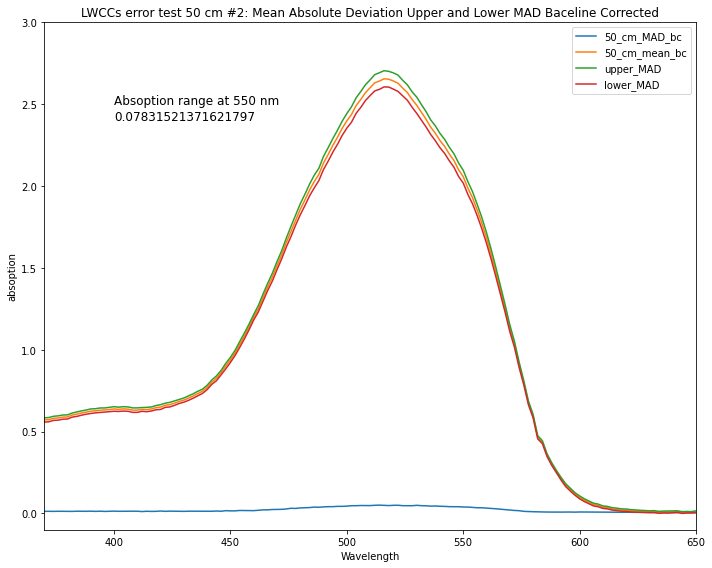

In [67]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF MEAN AND MAD
d = {'50_cm_MAD_bc': MAD_50cm_bc, 
    '50_cm_mean_bc': mean_50cm_bc}
d = pd.DataFrame(d, index = df2.index)

d["upper_MAD"] = d['50_cm_mean_bc'] + d['50_cm_MAD_bc']
d["lower_MAD"] = d['50_cm_mean_bc'] - d['50_cm_MAD_bc']

upper_mad = d["upper_MAD"]
lower_mad = d["lower_MAD"]

abs_range = upper_mad[550] - lower_mad[550]
abs_range

fig, ax = plt.subplots(figsize=(10,8))
d.plot(label='', ax=ax)
ax.set_ylim(-.1,3)
ax.set_xlim(370,650)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absoption")
ax.set_title("LWCCs error test 50 cm #2: Mean Absolute Deviation Upper and Lower MAD Baceline Corrected")
ax.text(400,2.5,f"Absoption range at 550 nm", fontsize=12, ha='left')
ax.text(400,2.4,f"{abs_range}", fontsize=12, ha='left')
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCCs_error_test_50cm_#2_MAD_BC.png')

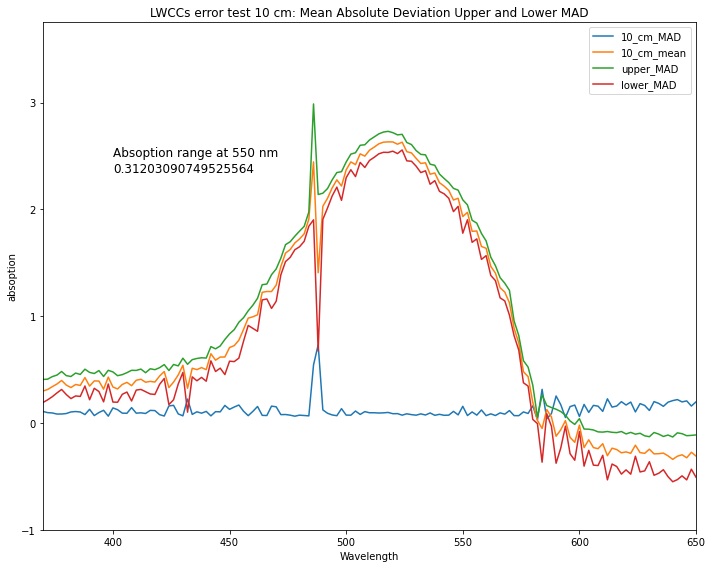

In [68]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF MEAN AND MAD
d = {'10_cm_MAD': MAD_10cm, 
    '10_cm_mean': mean_10cm}
d = pd.DataFrame(d, index = df2.index)

d["upper_MAD"] = d['10_cm_mean'] + d['10_cm_MAD']
d["lower_MAD"] = d['10_cm_mean'] - d['10_cm_MAD']

upper_mad = d["upper_MAD"]
lower_mad = d["lower_MAD"]

abs_range = upper_mad[550] - lower_mad[550]
abs_range

fig, ax = plt.subplots(figsize=(10,8))
d.plot(label='', ax=ax)
ax.set_ylim(-1,3.75)
ax.set_xlim(370,650)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absoption")
ax.set_title("LWCCs error test 10 cm: Mean Absolute Deviation Upper and Lower MAD")
ax.text(400,2.5,f"Absoption range at 550 nm", fontsize=12, ha='left')
ax.text(400,2.35,f"{abs_range}", fontsize=12, ha='left')
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCCs_error_test_10cm_#2_MAD.png')

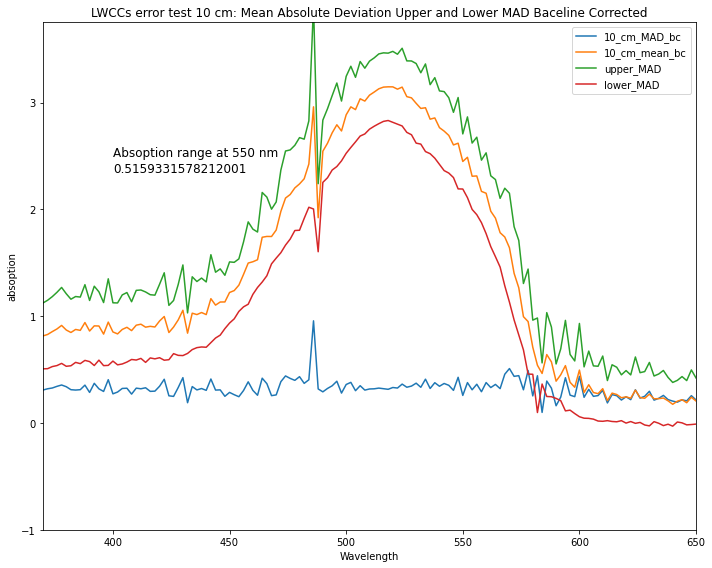

In [69]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF MEAN AND MAD
d = {'10_cm_MAD_bc': MAD_10cm_bc, 
    '10_cm_mean_bc': mean_10cm_bc}
d = pd.DataFrame(d, index = df2.index)

d["upper_MAD"] = d['10_cm_mean_bc'] + d['10_cm_MAD_bc']
d["lower_MAD"] = d['10_cm_mean_bc'] - d['10_cm_MAD_bc']

upper_mad = d["upper_MAD"]
lower_mad = d["lower_MAD"]

abs_range = upper_mad[550] - lower_mad[550]
abs_range

fig, ax = plt.subplots(figsize=(10,8))
d.plot(label='', ax=ax)
ax.set_ylim(-1,3.75)
ax.set_xlim(370,650)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absoption")
ax.set_title("LWCCs error test 10 cm: Mean Absolute Deviation Upper and Lower MAD Baceline Corrected")
ax.text(400,2.5,f"Absoption range at 550 nm", fontsize=12, ha='left')
ax.text(400,2.35,f"{abs_range}", fontsize=12, ha='left')
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCCs_error_test_10cm_#2_MAD_BC.png')

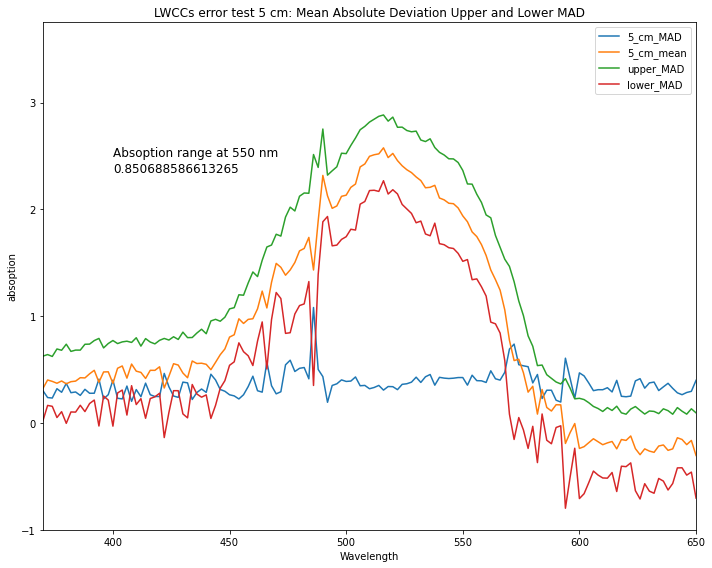

In [70]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF MEAN AND MAD
d = {'5_cm_MAD': MAD_5cm, 
    '5_cm_mean': mean_5cm}
d = pd.DataFrame(d, index = df2.index)

d["upper_MAD"] = d['5_cm_mean'] + d['5_cm_MAD']
d["lower_MAD"] = d['5_cm_mean'] - d['5_cm_MAD']

upper_mad = d["upper_MAD"]
lower_mad = d["lower_MAD"]

abs_range = upper_mad[550] - lower_mad[550]
abs_range

fig, ax = plt.subplots(figsize=(10,8))
d.plot(label='', ax=ax)
ax.set_ylim(-1,3.75)
ax.set_xlim(370,650)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absoption")
ax.set_title("LWCCs error test 5 cm: Mean Absolute Deviation Upper and Lower MAD")
ax.text(400,2.5,f"Absoption range at 550 nm", fontsize=12, ha='left')
ax.text(400,2.35,f"{abs_range}", fontsize=12, ha='left')
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCCs_error_test_5cm_#2_MAD.png')

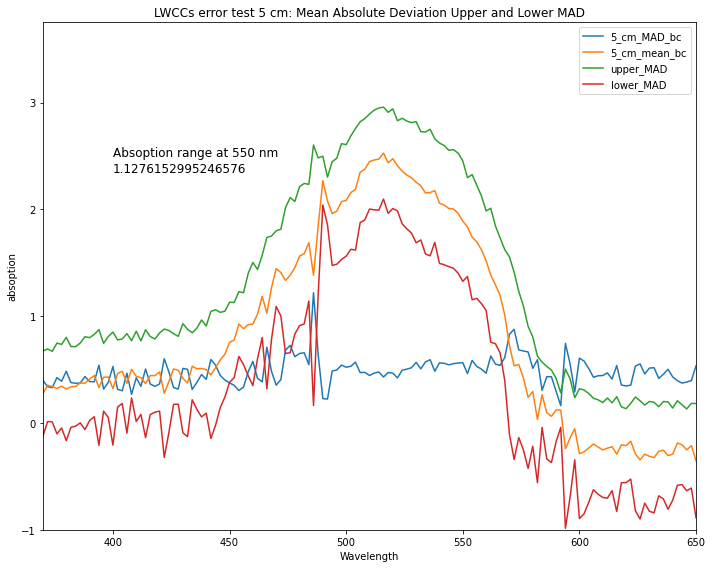

In [71]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF MEAN AND MAD
d = {'5_cm_MAD_bc': MAD_5cm_bc, 
    '5_cm_mean_bc': mean_5cm_bc}
d = pd.DataFrame(d, index = df2.index)

d["upper_MAD"] = d['5_cm_mean_bc'] + d['5_cm_MAD_bc']
d["lower_MAD"] = d['5_cm_mean_bc'] - d['5_cm_MAD_bc']

upper_mad = d["upper_MAD"]
lower_mad = d["lower_MAD"]

abs_range = upper_mad[550] - lower_mad[550]
abs_range

fig, ax = plt.subplots(figsize=(10,8))
d.plot(label='', ax=ax)
ax.set_ylim(-1,3.75)
ax.set_xlim(370,650)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absoption")
ax.set_title("LWCCs error test 5 cm: Mean Absolute Deviation Upper and Lower MAD")
ax.text(400,2.5,f"Absoption range at 550 nm", fontsize=12, ha='left')
ax.text(400,2.35,f"{abs_range}", fontsize=12, ha='left')
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/LWCCs_error_test_5cm_#2_MAD_BC.png')

In [156]:
files = glob.glob('../../../Data_Thesis/CDOM/GOM22SP/BC/ABS_BC_GOM22SP_St.MK_2222/222250_Absorbance__0__09.txt')
files

import os # OS library

# REMOVE THIS CELL ONE YOU GET IT
ID = os.path.basename(files[-1])[:-4].split("_")
#ID = os.path.basename(files[-24])[:-4].split("_")
print('basename. SO indep. Extract filename:', ID)
ID = list(filter(None, ID))
# '_'.join(ID[::3])
ID.pop(1)
print('pop removes position 1', ID)
ID = '_'.join(ID)
print("")
print("here is an example:")
print(ID)
# ID = '_'.join(ID.remove('Absorbance'))
# ID

#LOAD FILE
def open_files(name):
    # reads individual scan files
    df = pd.read_table(name, skiprows=14,names=['wl', 'abs'], index_col='wl')
    # extract ID from filename
    ID = os.path.basename(name)[:-4].split("_")
    ID.pop(1)
    ID = '_'.join(list(filter(None, ID)))
    # rename col name with ID
    df = df.rename(columns={'abs': ID})
    return df

#LOOP TRU FILES TO MAKE ONE EASY TO USE DATA FRAME 
#columns are scanns and rows are wavelths 

frames = [open_files(f) for f in files]
df = pd.concat(frames, axis=1) # joins along cols  

print("files loaded :)")



basename. SO indep. Extract filename: ['222250', 'Absorbance', '', '0', '', '09']
pop removes position 1 ['222250', '0', '09']

here is an example:
222250_0_09
files loaded :)


graph showing the cdom Absortion data


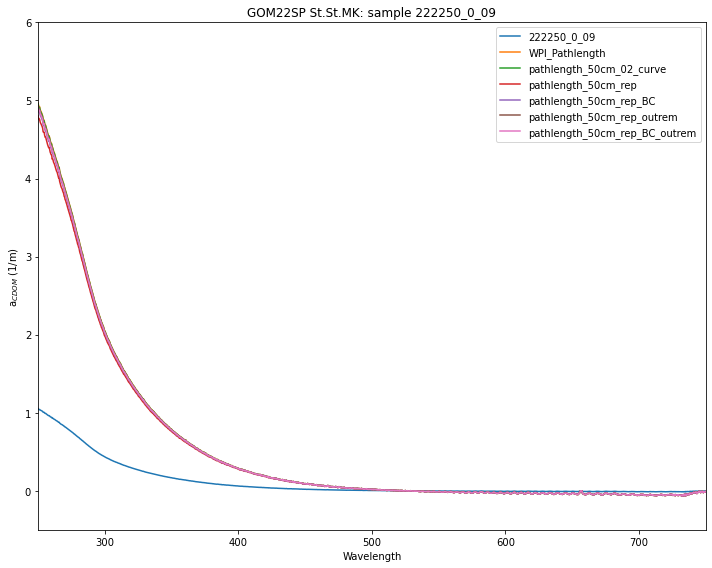

In [157]:
#Absorbance to Absortion
df["WPI_Pathlength"] = df["222250_0_09"]*(2.303/WPI_LWCC_50_02) 
df["pathlength_50cm_02_curve"] = df["222250_0_09"]*(2.303/pathlength_50cm_02)
df["pathlength_50cm_rep"] = df["222250_0_09"]*(2.303/pathlength_50cm_rep)
df["pathlength_50cm_rep_BC"] = df["222250_0_09"]*(2.303/pathlength_50cm_rep_BC)
df["pathlength_50cm_rep_outrem"] = df["222250_0_09"]*(2.303/pathlength_50cm_rep_outrem)
df["pathlength_50cm_rep_BC_outrem"] = df["222250_0_09"]*(2.303/pathlength_50cm_rep_BC_outrem)
#make a plot to make sure nothing is too crazy 

fig, ax = plt.subplots(figsize=(10,8))
df.plot(ax=ax)
ax.set_ylim(-.5,6)
ax.set_xlim(250,750)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("GOM22SP St.St.MK: sample 222250_0_09")

plt.tight_layout()

print('graph showing the cdom Absortion data')

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/sample_222250_0_09_ests.png')

graph showing the cdom Absortion data


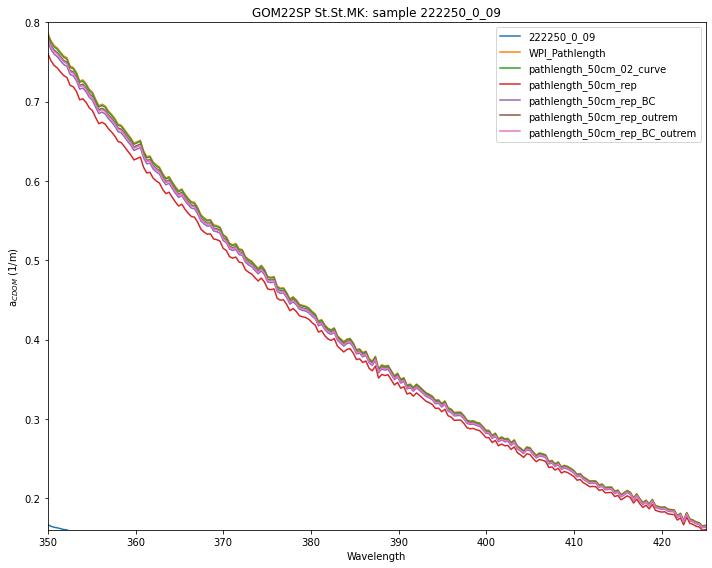

In [158]:
#Absorbance to Absortion
df["WPI_Pathlength"] = df["222250_0_09"]*(2.303/WPI_LWCC_50_02) 
df["pathlength_50cm_02_curve"] = df["222250_0_09"]*(2.303/pathlength_50cm_02)
df["pathlength_50cm_rep"] = df["222250_0_09"]*(2.303/pathlength_50cm_rep)
df["pathlength_50cm_rep_BC"] = df["222250_0_09"]*(2.303/pathlength_50cm_rep_BC)
df["pathlength_50cm_rep_outrem"] = df["222250_0_09"]*(2.303/pathlength_50cm_rep_outrem)
df["pathlength_50cm_rep_BC_outrem"] = df["222250_0_09"]*(2.303/pathlength_50cm_rep_BC_outrem)
#make a plot to make sure nothing is too crazy 

fig, ax = plt.subplots(figsize=(10,8))
df.plot(ax=ax)
ax.set_ylim(.16,.8)
ax.set_xlim(350,425)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("GOM22SP St.St.MK: sample 222250_0_09")

plt.tight_layout()

print('graph showing the cdom Absortion data')

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/sample_222250_0_09_ests_ZOOM.png')

In [159]:
files = glob.glob('../../../Data_Thesis/CDOM/GOM22SP/BC/ABS_BC_GOM22SP_St.MK_2222/22225*_1__0*.txt')
files

import os # OS library

# REMOVE THIS CELL ONE YOU GET IT
ID = os.path.basename(files[-1])[:-4].split("_")
#ID = os.path.basename(files[-24])[:-4].split("_")
print('basename. SO indep. Extract filename:', ID)
ID = list(filter(None, ID))
# '_'.join(ID[::3])
ID.pop(1)
print('pop removes position 1', ID)
ID = '_'.join(ID)
print("")
print("here is an example:")
print(ID)
# ID = '_'.join(ID.remove('Absorbance'))
# ID

#LOAD FILE
def open_files(name):
    # reads individual scan files
    df = pd.read_table(name, skiprows=14,names=['wl', 'abs'], index_col='wl')
    # extract ID from filename
    ID = os.path.basename(name)[:-4].split("_")
    ID.pop(1)
    ID = '_'.join(list(filter(None, ID)))
    # rename col name with ID
    df = df.rename(columns={'abs': ID})
    return df

#LOOP TRU FILES TO MAKE ONE EASY TO USE DATA FRAME 
#columns are scanns and rows are wavelths 

frames = [open_files(f) for f in files]
df = pd.concat(frames, axis=1) # joins along cols  

print("files loaded :)")

basename. SO indep. Extract filename: ['222258', 'Absorbance', '', '1', '', '04']
pop removes position 1 ['222258', '1', '04']

here is an example:
222258_1_04
files loaded :)


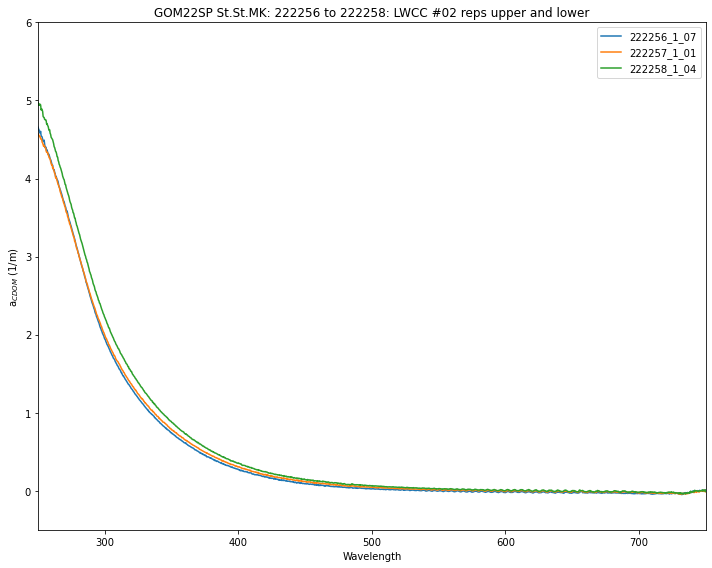

In [160]:
#Absorbance to Absortion
df_cl = df*(2.303/pathlength_50cm_rep) # to avoid overwriting when reruning the cell

#make a plot to make sure nothing is too crazy 

fig, ax = plt.subplots(figsize=(10,8))
df_cl.plot(ax=ax)
ax.set_ylim(-.5,6)
ax.set_xlim(250,750)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("GOM22SP St.St.MK: 222256 to 222258: LWCC #02 reps upper and lower")

plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/sample_222256-222258.png')

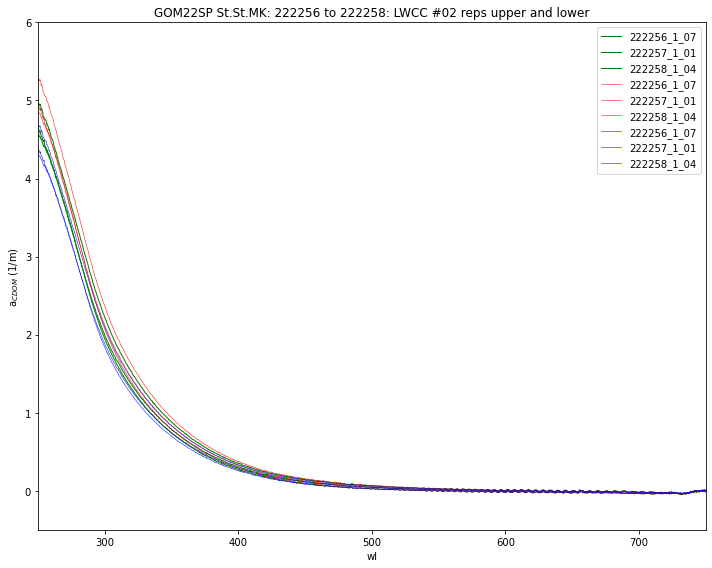

In [161]:
#Absorbance to Absortion
df_cl = df*(2.303/pathlength_50cm_rep) # to avoid overwriting when reruning the cell
df_low = df*(2.303/CI_lower_50cm_rep)
df_hig = df*(2.303/CI_upper_50cm_rep)

#make a plot to make sure nothing is too crazy 

fig, ax = plt.subplots(figsize=(10,8))
df_cl.plot(ax=ax, c = "green", linewidth=1)
ax.set_ylim(-.5,6)
ax.set_xlim(250,750)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("GOM22SP St.St.MK: 222256 to 222258: LWCC #02 reps upper and lower")

df_low.plot(ax=ax, c = 'red', linewidth=.5)
df_hig.plot(ax=ax, c = 'blue', linewidth=.5)

plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/sample_222256-222258_CI.png')

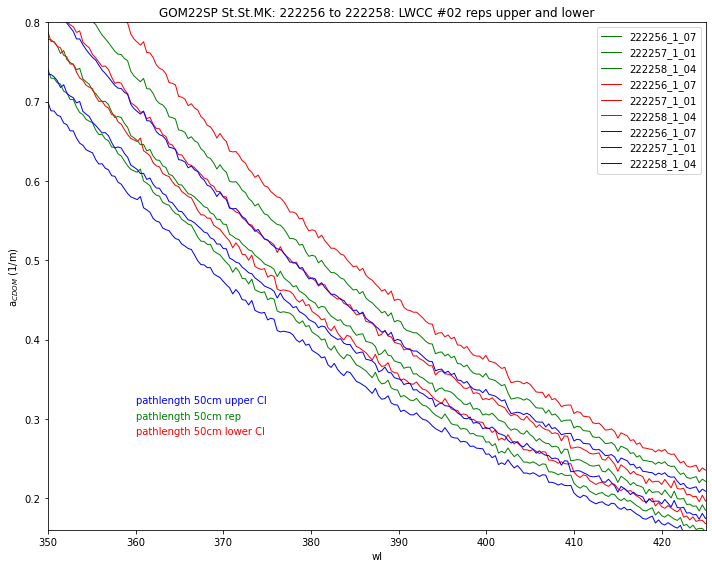

In [172]:
#Absorbance to Absortion
df_cl = df*(2.303/pathlength_50cm_rep) # to avoid overwriting when reruning the cell
df_low = df*(2.303/CI_lower_50cm_rep)
df_hig = df*(2.303/CI_upper_50cm_rep)

#make a plot to make sure nothing is too crazy 

fig, ax = plt.subplots(figsize=(10,8))
df_cl.plot(ax=ax, c = "green", linewidth=1)
ax.set_ylim(.16,.8)
ax.set_xlim(350,425)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("GOM22SP St.St.MK: 222256 to 222258: LWCC #02 reps upper and lower")

df_low.plot(ax=ax, c = 'red', linewidth=1)
df_hig.plot(ax=ax, c = 'blue', linewidth=1)

ax.text(360,.3,f"pathlength 50cm rep", fontsize=10, ha='left', c = 'green')
ax.text(360,.28,f"pathlength 50cm lower CI", fontsize=10, ha='left', c = 'red')
ax.text(360,.32,f"pathlength 50cm upper CI", fontsize=10, ha='left', c = 'blue')

plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/sample_222256-222258_ZOOM.png')

In [72]:
# to do 

#3: test CI on CDOM Spectra 
#4: pub that chris sent 
#5: err with langeth for reps and % diff 
#6: outlyer removall for all and recalk PL  
